In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  4 07:02:45 2024

@author: robberto
"""

from astropy.io import fits
import matplotlib.pyplot as plt

import os
import shutil
import glob
import numpy as np
import pandas as pd
import copy
import heapq

from scipy.signal import find_peaks
import cv2

## """ Instantiate the class with the correct directory name"""

In [3]:
data_path = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI"
from Class_SAMOS import SAMOS
SAMOS = SAMOS(data_path) 

working on the directory: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI


### Check the files you want to process here
https://www.stsci.edu/~robberto/Main/SAMOS/Run_October2024/SAMI/QL_20241017/overview.html

## SELECT A TARGET AND INSPECT THE FILES YOU MAY WANT TO USE. ANNOTATE BELOW

In [6]:
# DATA ANALYSIS 
target_name = "ABELL3120"
target_mode  = "SAMI_manual_Mask_T00_Low_Red"

"""
=> Night 20241017
TARGET = target.025.fits [600s], target.026.fits [600s], target.027.fits [600s]
FLATS  = target.028.fits [2s], calibration.029.fits [2s]
ARC_Ne = calibration.033.fits [10s]
ARC_HgAr = calibration.030.fits [8s]
ARC_HgArNe = calibration.031.fits   [10s], calibration.032.fits [8s]  
ARC_Ne_DMDoff = calibration.034.fits [8s]
ARC_HgAr_DMDoff = calibration.036.fits [8s]
ARC_HgArNe_DMDoff = calibration.035.fits [8s]

=> Night 20241016
BIAS =  bias.055.fits - bias.074.fits 

=> Night 20241016
FLATS_DMDoff = flat019.fits [0.1s]; flat.020.fits[1s]
"""

'\n=> Night 20241017\nTARGET = target.025.fits [600s], target.026.fits [600s], target.027.fits [600s]\nFLATS  = target.028.fits [2s], calibration.029.fits [2s]\nARC_Ne = calibration.033.fits [10s]\nARC_HgAr = calibration.030.fits [8s]\nARC_HgArNe = calibration.031.fits   [10s], calibration.032.fits [8s]  \nARC_Ne_DMDoff = calibration.034.fits [8s]\nARC_HgAr_DMDoff = calibration.036.fits [8s]\nARC_HgArNe_DMDoff = calibration.035.fits [8s]\n\n=> Night 20241016\nBIAS =  bias.055.fits - bias.074.fits \n\n=> Night 20241016\nFLATS_DMDoff = flat019.fits [0.1s]; flat.020.fits[1s]\n'

In [7]:
#CREATE A WORKING DIRECTORY WITH THE TARGET NAME IF IT DOES NOT EXIST
analysis_top_directory ="/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS"
working_directory = os.path.join(analysis_top_directory,target_name,target_mode)

# if the folder already exists in new directory
if not os.path.exists(working_directory):
        os.makedirs(working_directory)
os.chdir(working_directory) 
print(working_directory)

#DATA DIRECTORIES WHERE THE SAMOS FILES ARE STORED
data_directory = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI"
data_directory_17 = data_directory + "/20241017"
data_directory_16 = data_directory + "/20241016"
data_directory_09 = data_directory + "/20241009"

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red


In [8]:
#first we define a function that finds the edges of a 1-d vector
def find_edges(data):
    threshold = (max(data)-min(data))/5  
    gradient = [data[i] - data[i-1] for i in range(1, len(data))]
    edges = [i for i, grad in enumerate(gradient) if abs(grad) > threshold]
    return edges

In [9]:
for i_s in range(14):

    #READ THE FITS FILE
    #====================================================================================
    fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s)
    
    hdul = fits.open(fits_file)
    hdr = hdul[0].header
    hdul.info()


Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 41)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 41)   float64   
  3  LINES         1 ImageHDU         8   (409

## LOOP OVER ALL MASKS

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  SLIT    =                    0                                                  I0      =                  241 / y[0] pixel of the 2d cut                       I1      = 

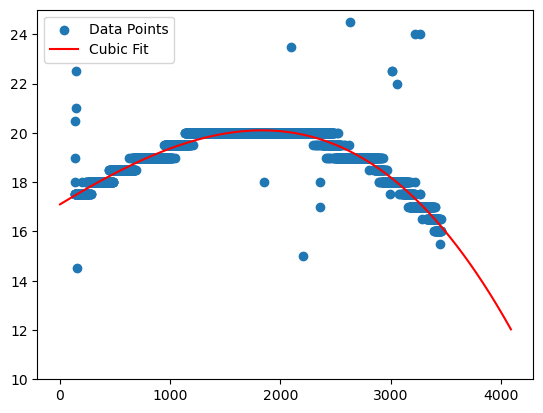

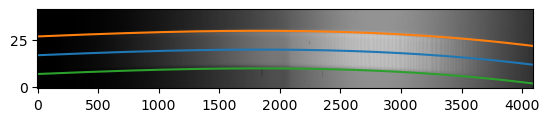

(42, 4094)


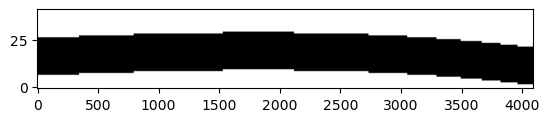

0 (42, 4094)


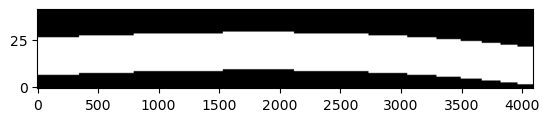

(42, 4094)
(42, 4094)


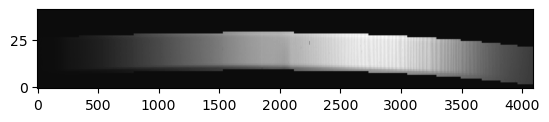

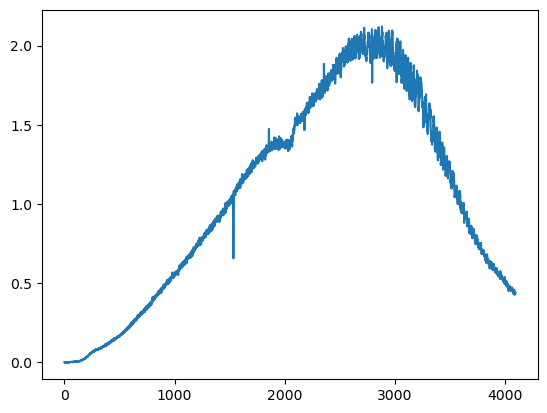

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


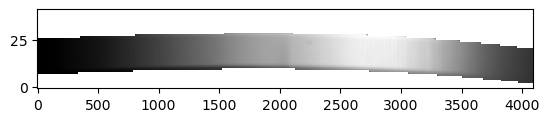

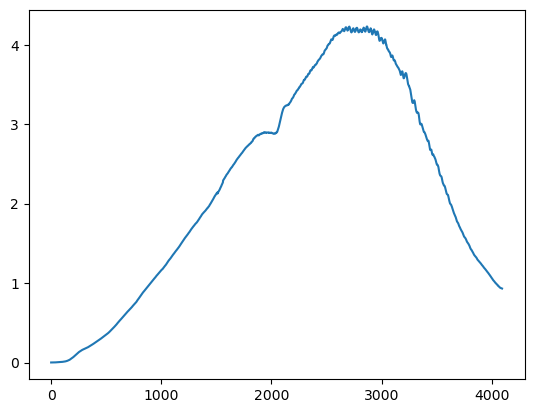

(42, 4094)
(42, 4094)


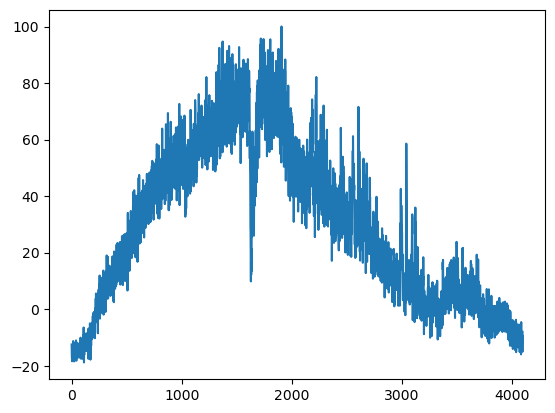

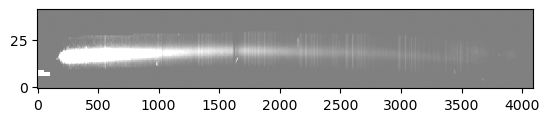

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          2.11566181  0.21037989  7.64489509  7.28088199
 13.64338586 19.45870422 17.05029971 14.62326989  6.19546375  6.28648783
  1.51415691  0.2878938   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


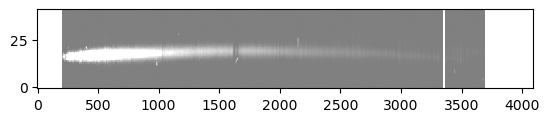

(84, 4094) (84, 4094)


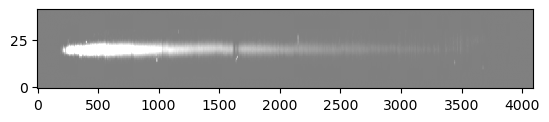

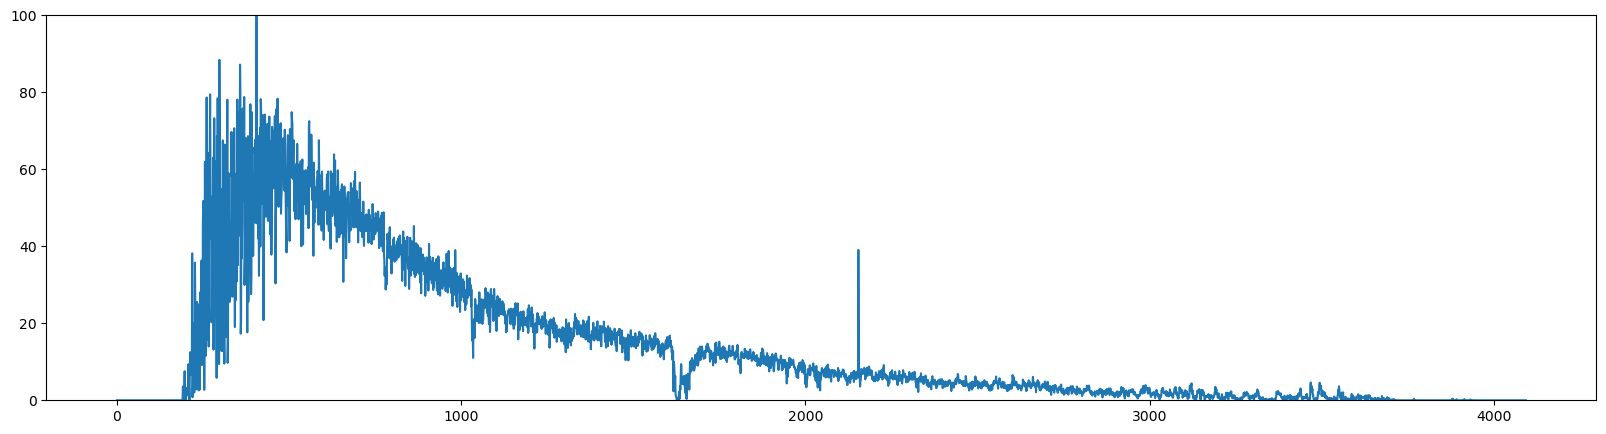

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

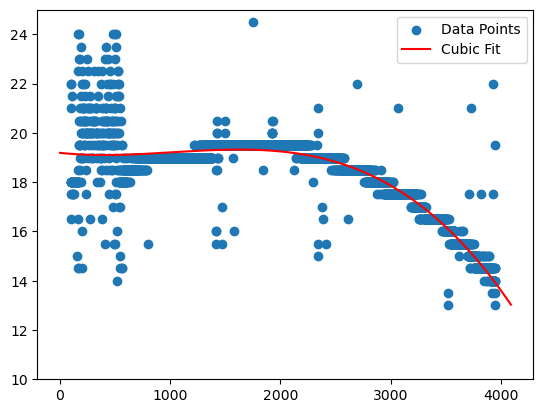

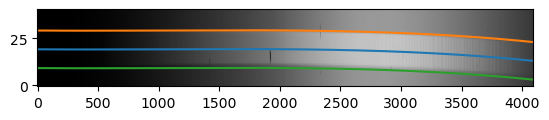

(41, 4094)


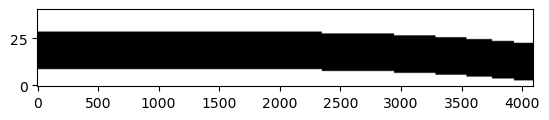

1 (41, 4094)


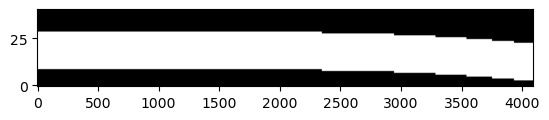

(41, 4094)
(41, 4094)


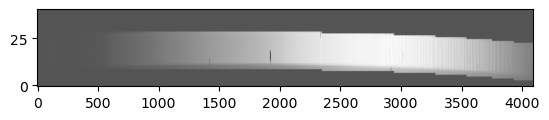

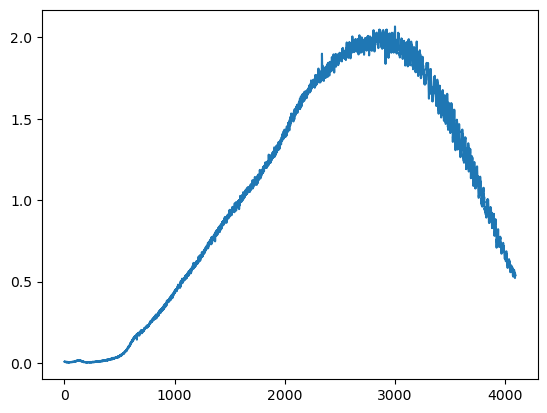

(41, 4094)
(41, 4094)
(41, 4094) (41, 4094)


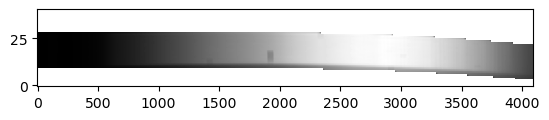

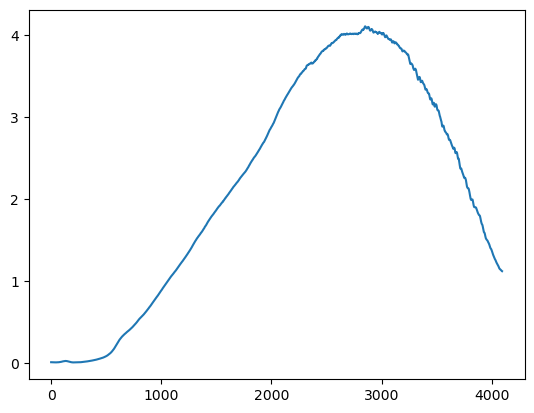

(41, 4094)
(41, 4094)


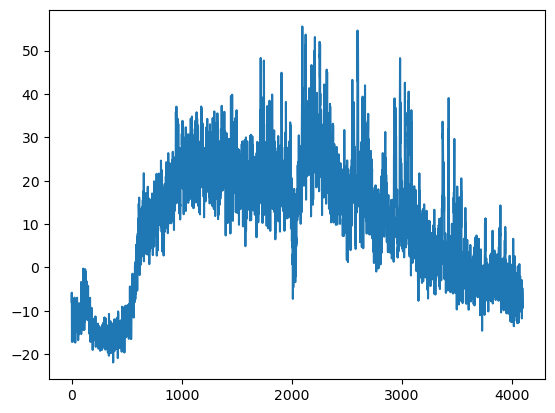

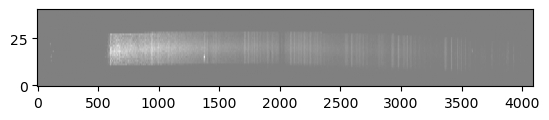

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.99108071e+00 4.23275996e-03 3.61231459e+00 2.53505608e+00
 2.97850541e+00 1.09737104e+00 5.55508132e+00 4.28477701e+00
 2.32817132e+00 3.97244770e+00 3.12684856e+00 1.78825350e+00
 2.70196600e+00 0.00000000e+00 2.91827688e+00 3.95743414e-01
 7.36514852e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


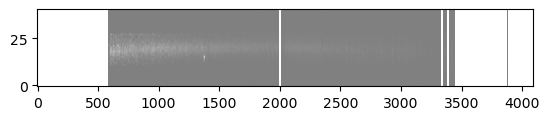

(82, 4094) (82, 4094)


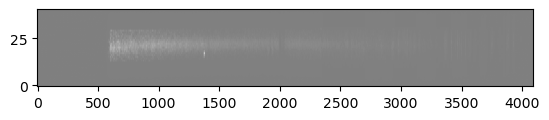

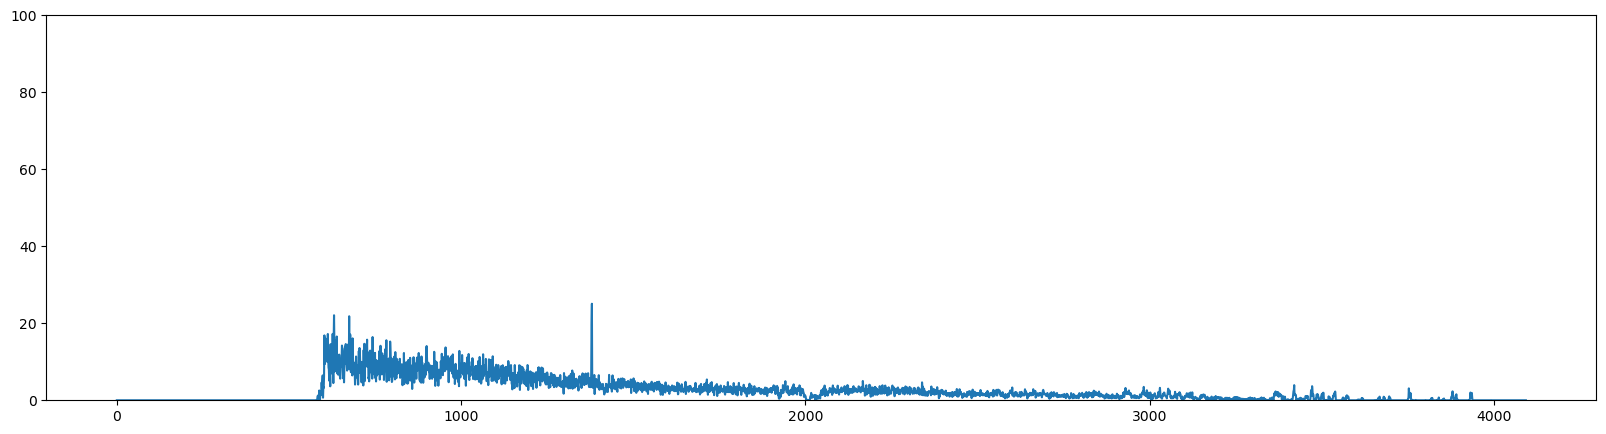

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 41)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 41)   float64   
  3  LINES         1 ImageHDU         8   (4094, 41)   float64   
  4  MASK          1 ImageHDU         8   (4094, 41)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 41)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

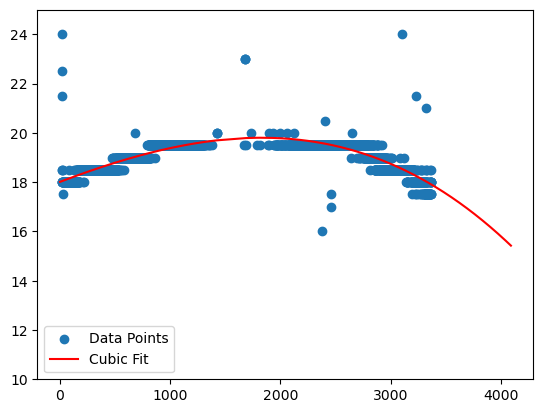

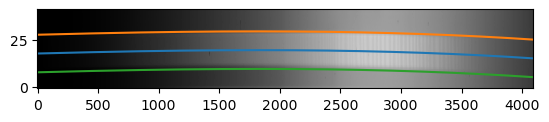

(42, 4094)


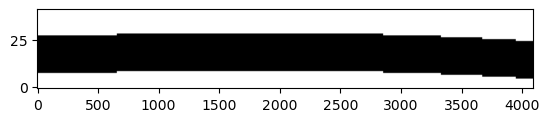

2 (42, 4094)


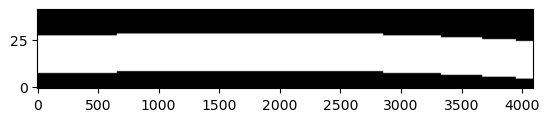

(42, 4094)
(42, 4094)


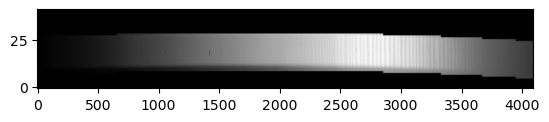

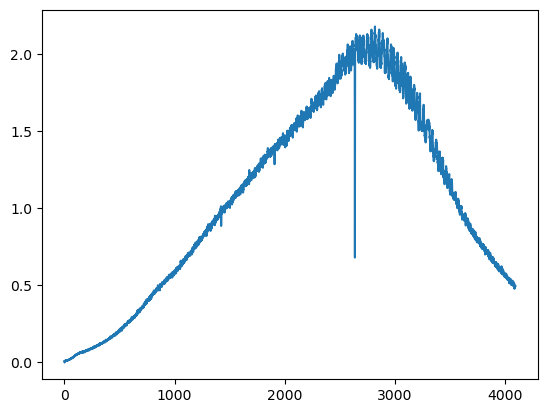

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


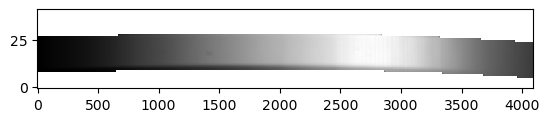

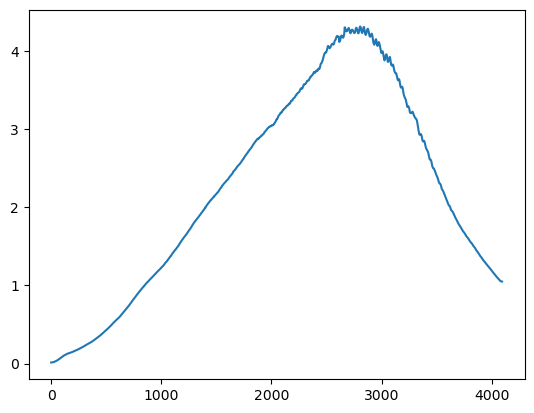

(42, 4094)
(42, 4094)


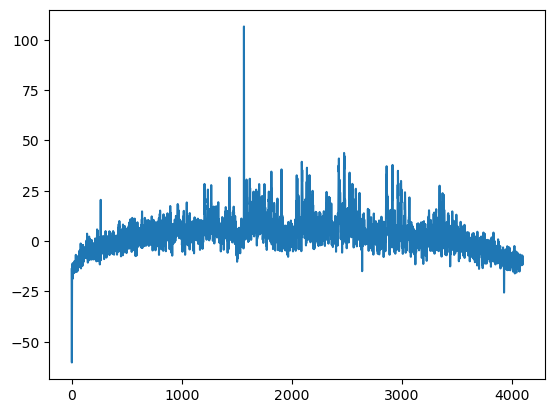

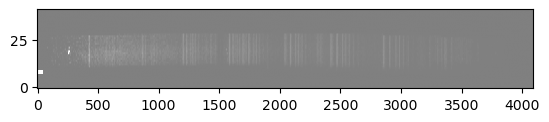

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         2.83208697 1.6998571  0.08780771 0.
 0.         0.         0.         1.02974595 0.10224482 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


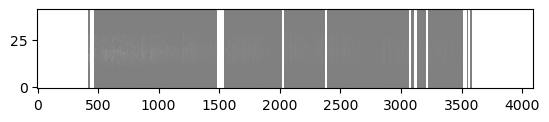

(84, 4094) (84, 4094)


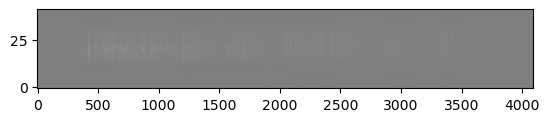

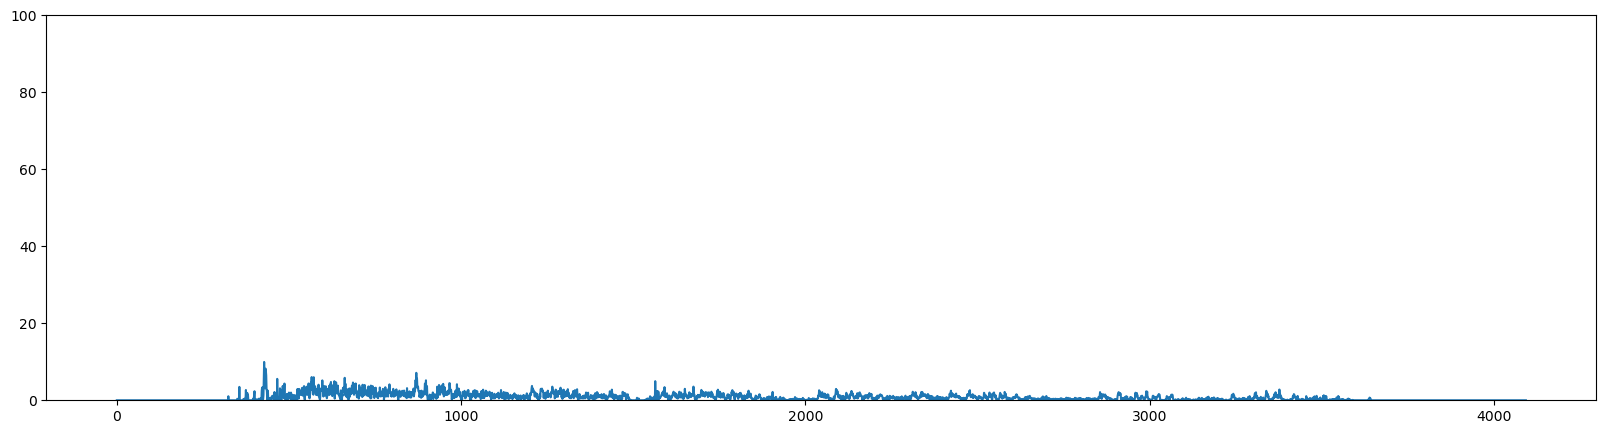

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

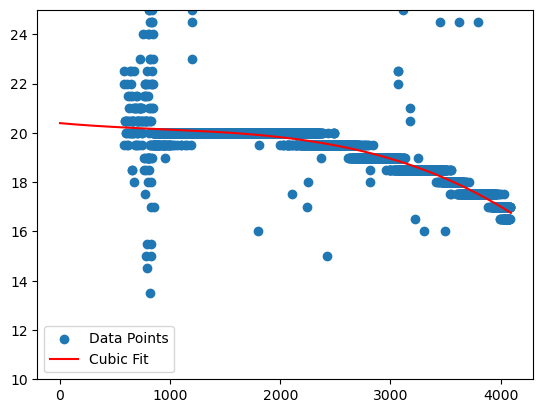

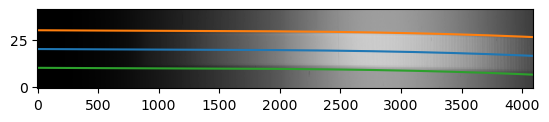

(42, 4094)


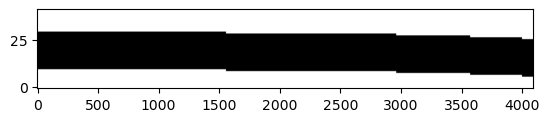

3 (42, 4094)


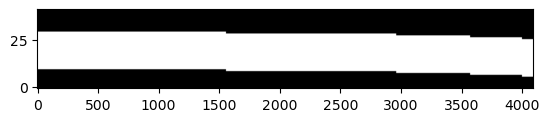

(42, 4094)
(42, 4094)


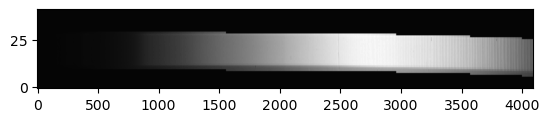

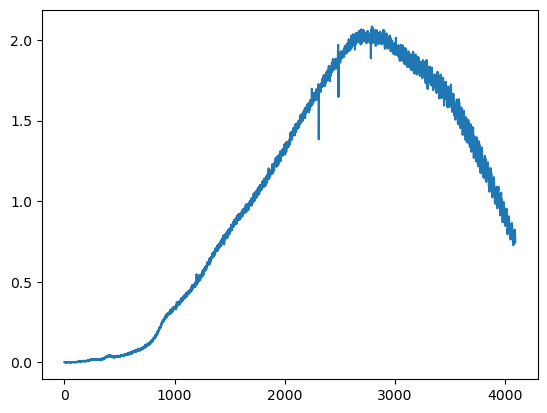

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


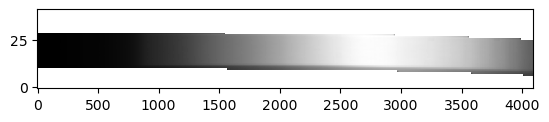

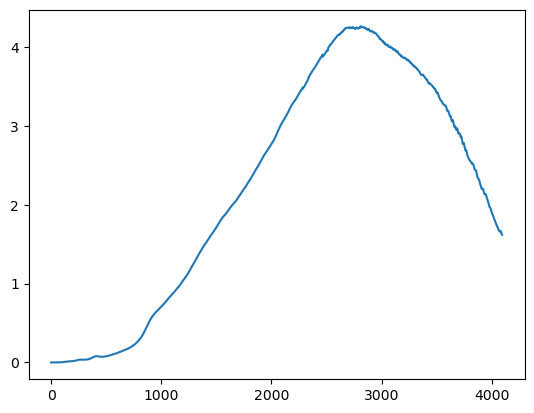

(42, 4094)
(42, 4094)


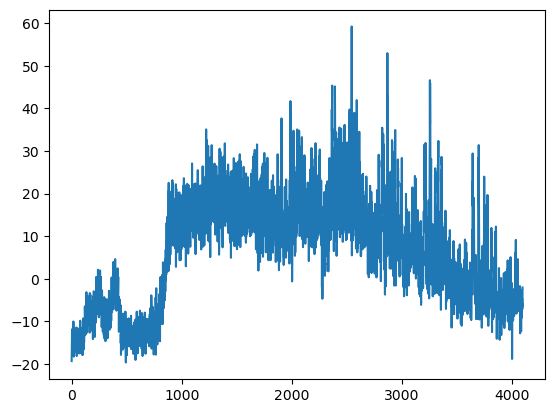

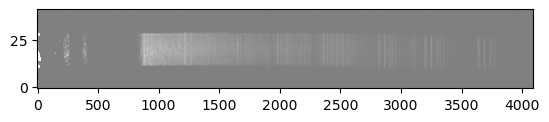

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.09224598 1.3547095  2.51694591 4.1011798  1.89741261 0.97388903
 4.36371524 5.47787558 3.96864877 5.70526079 5.31736303 4.44236748
 5.694163   5.59342685 0.30571652 3.79919511 2.85480288 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


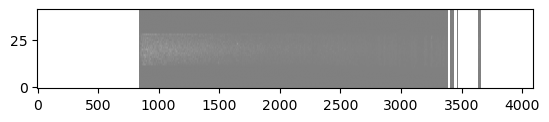

(84, 4094) (84, 4094)


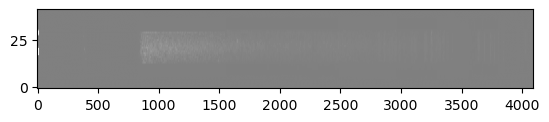

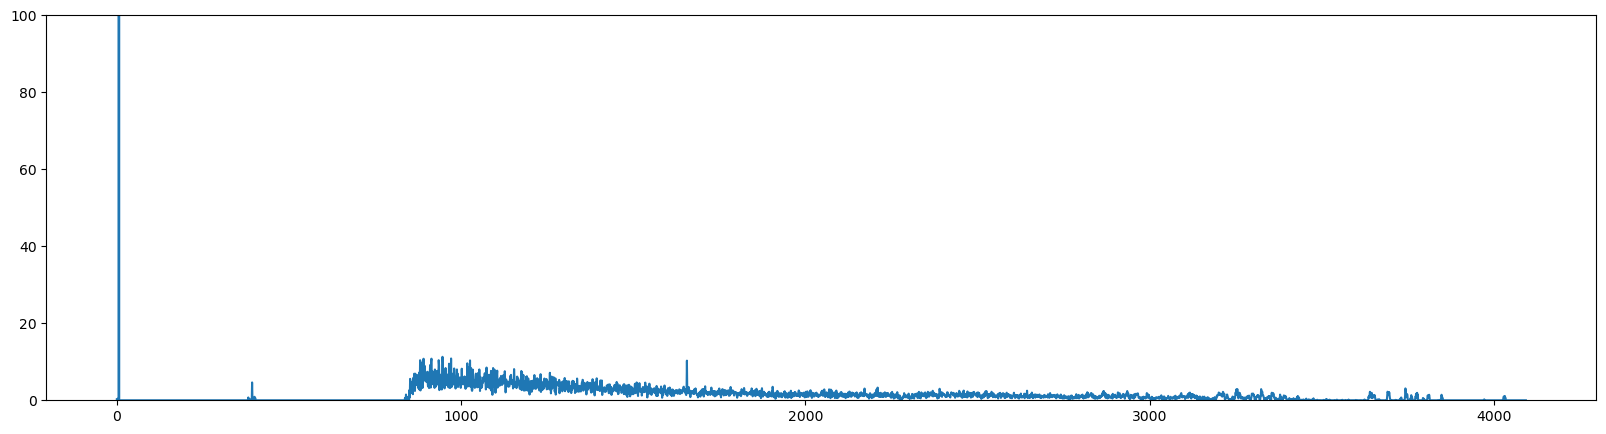

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

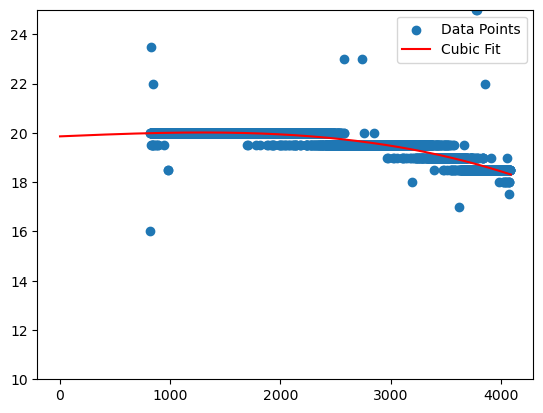

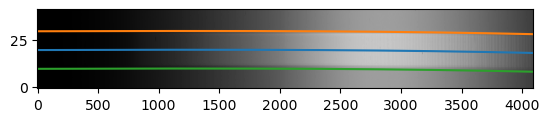

(42, 4094)


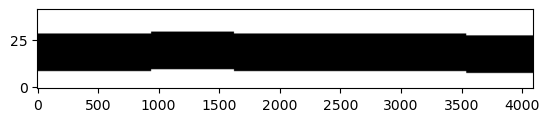

4 (42, 4094)


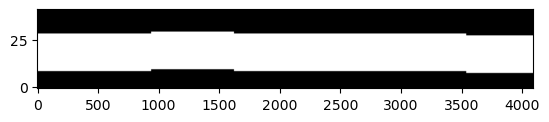

(42, 4094)
(42, 4094)


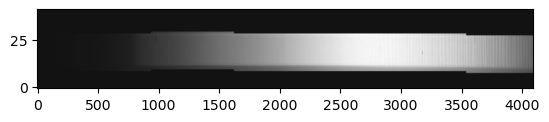

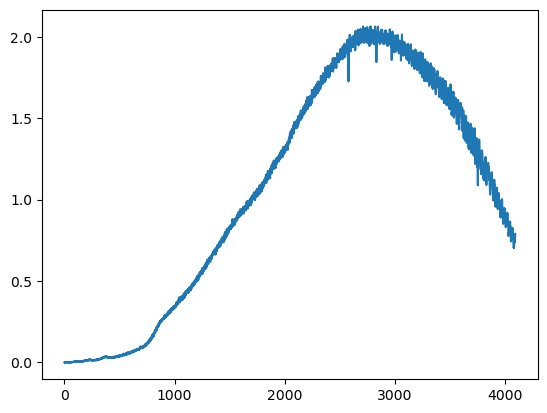

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


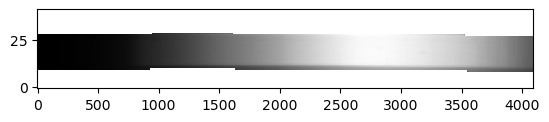

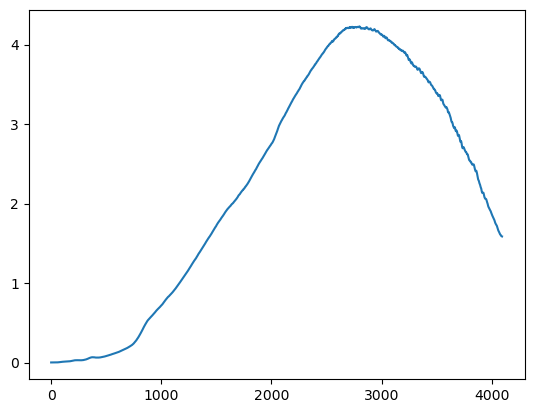

(42, 4094)
(42, 4094)


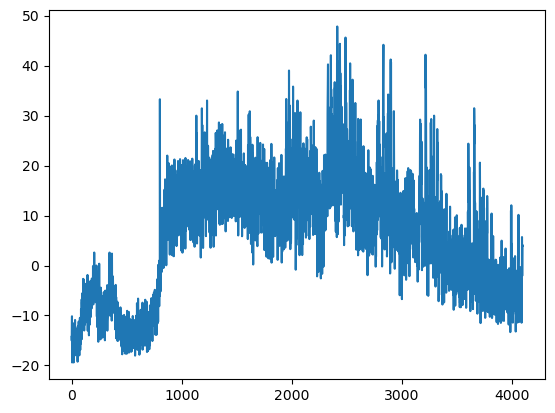

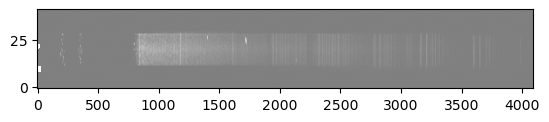

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05927553 0.         0.
 4.4405264  2.37737505 2.63491373 2.9244603  4.32885395 6.88167363
 4.22478591 6.86785226 3.48571607 3.48303219 8.89378359 3.76803611
 1.83412411 4.95683269 3.00691893 4.56911635 0.60078649 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


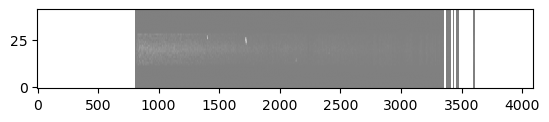

(84, 4094) (84, 4094)


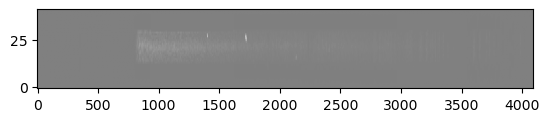

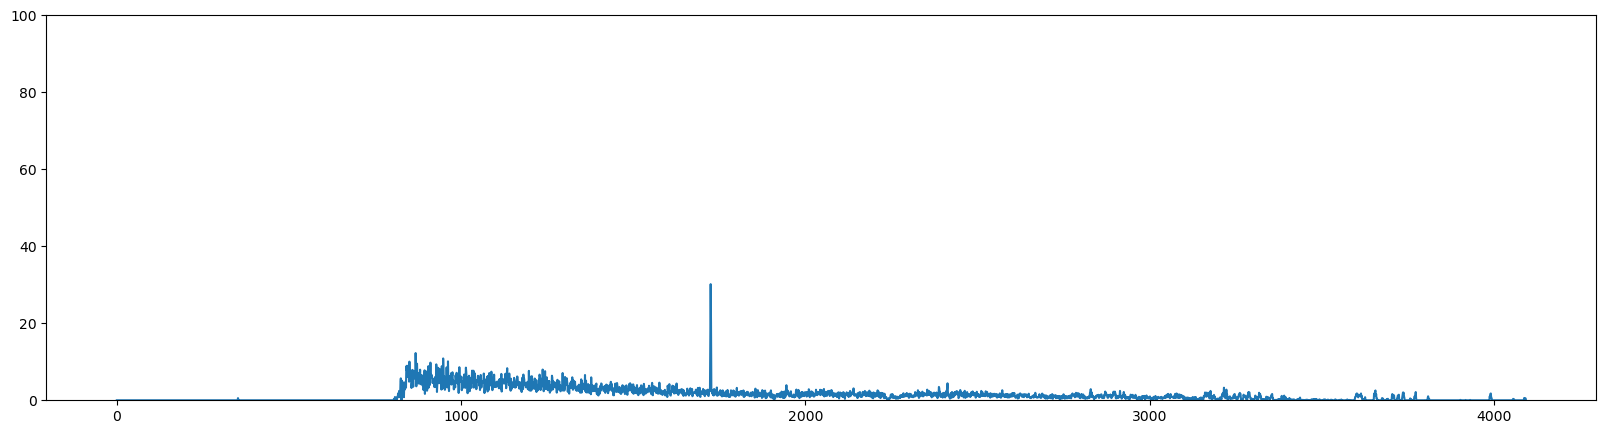

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

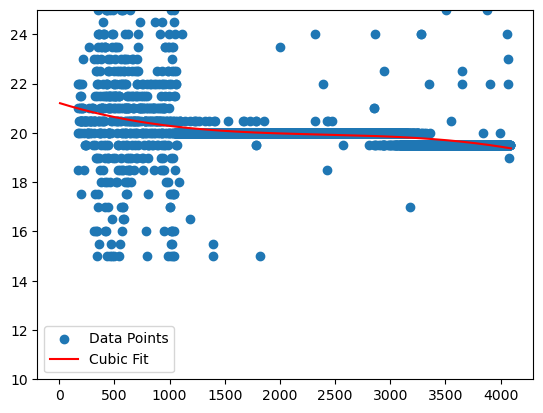

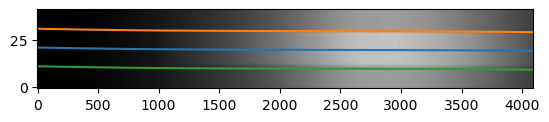

(42, 4094)


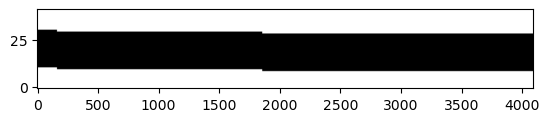

5 (42, 4094)


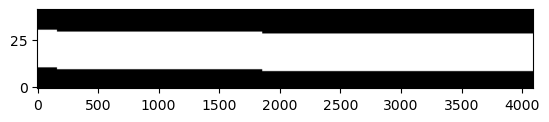

(42, 4094)
(42, 4094)


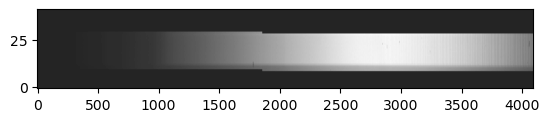

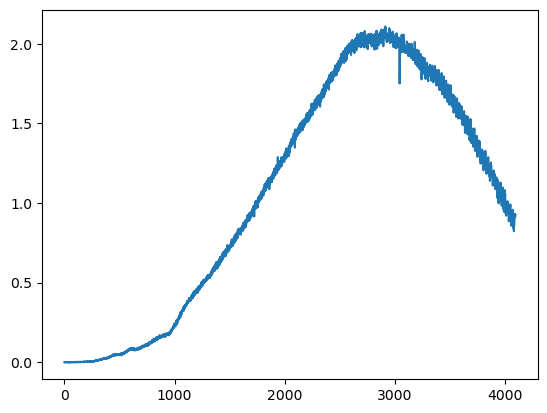

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


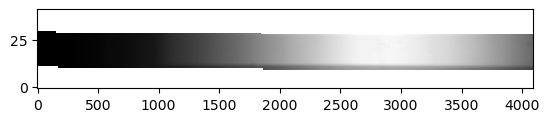

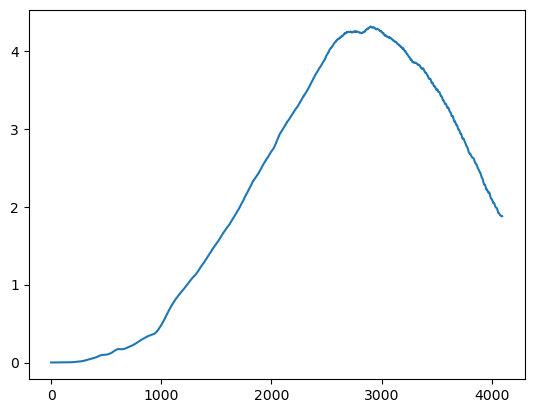

(42, 4094)
(42, 4094)


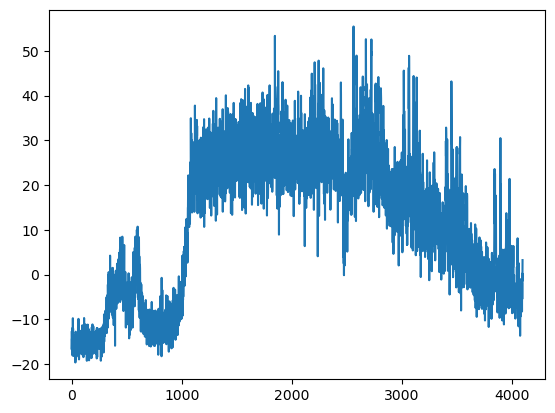

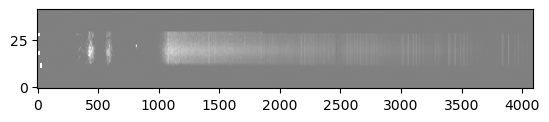

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.34536499  2.22610405  5.79894178  5.77452238  5.42236398
 10.08703829  8.44324398  6.46779321 10.51866563  7.18761805  7.17773334
  4.52749077  2.90125204  5.5412672   5.34233954  2.08299912  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


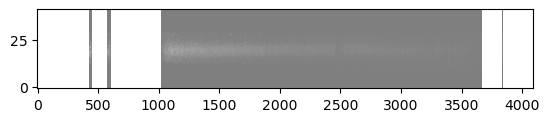

(84, 4094) (84, 4094)


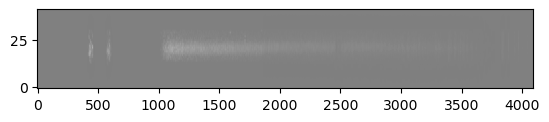

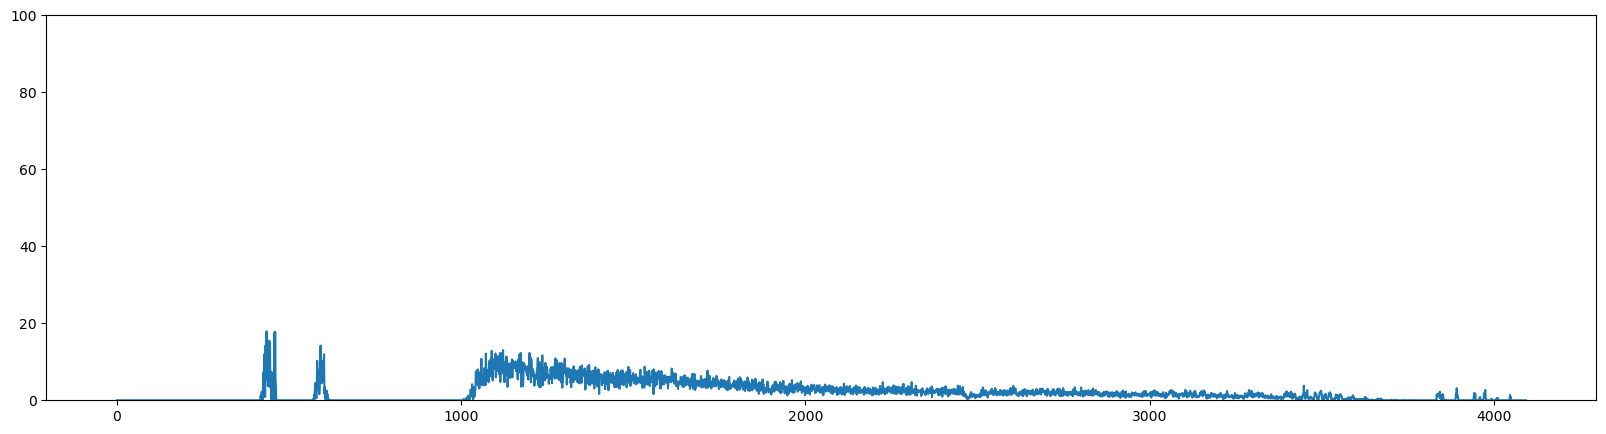

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

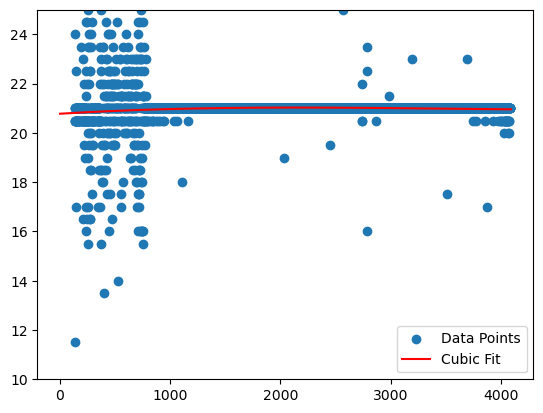

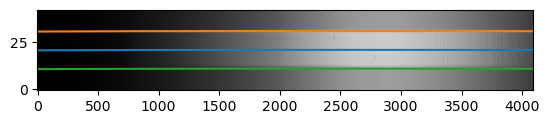

(43, 4094)


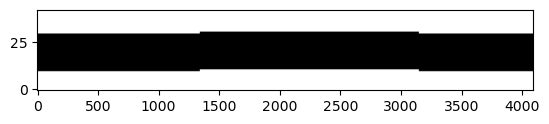

6 (43, 4094)


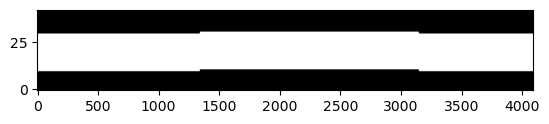

(43, 4094)
(43, 4094)


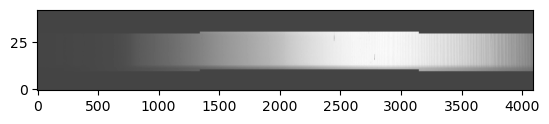

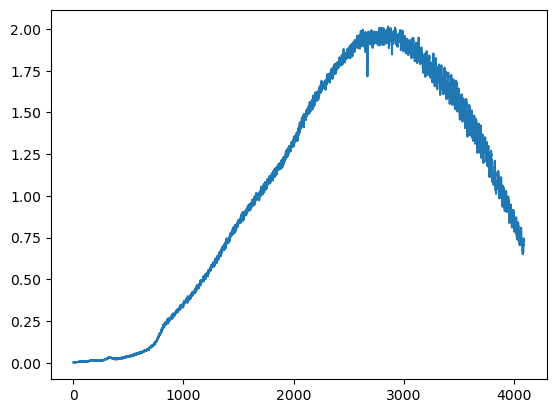

(43, 4094)
(43, 4094)
(43, 4094) (43, 4094)


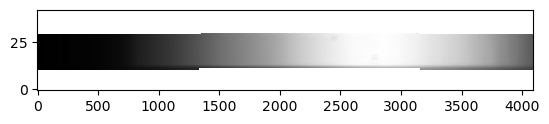

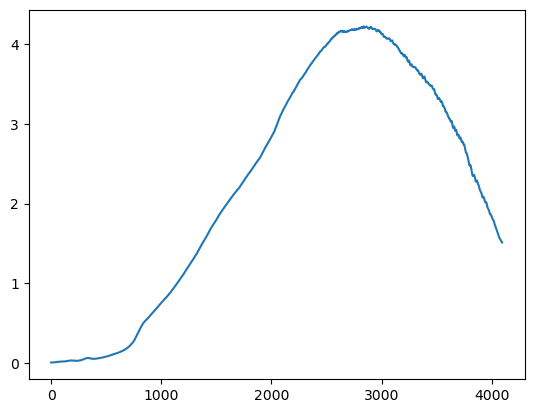

(43, 4094)
(43, 4094)


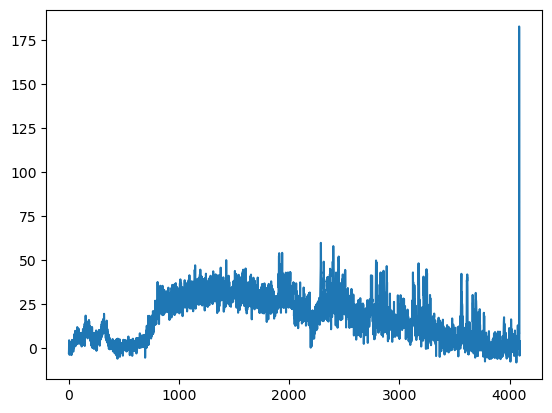

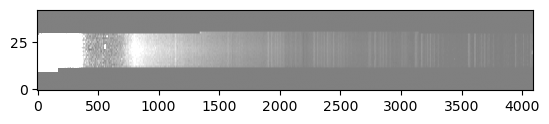

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 11.98296686  7.28821477  7.90591397 11.7126585   7.48497204 10.71426806
 10.90083946 12.1887875  10.9618228  10.78269924 11.18340214  8.35818181
  9.04858076  8.80351537  9.39415413 10.39718371  7.67817027  7.78296858
  7.50958533  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]


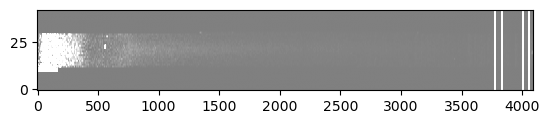

(86, 4094) (86, 4094)


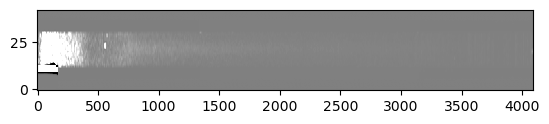

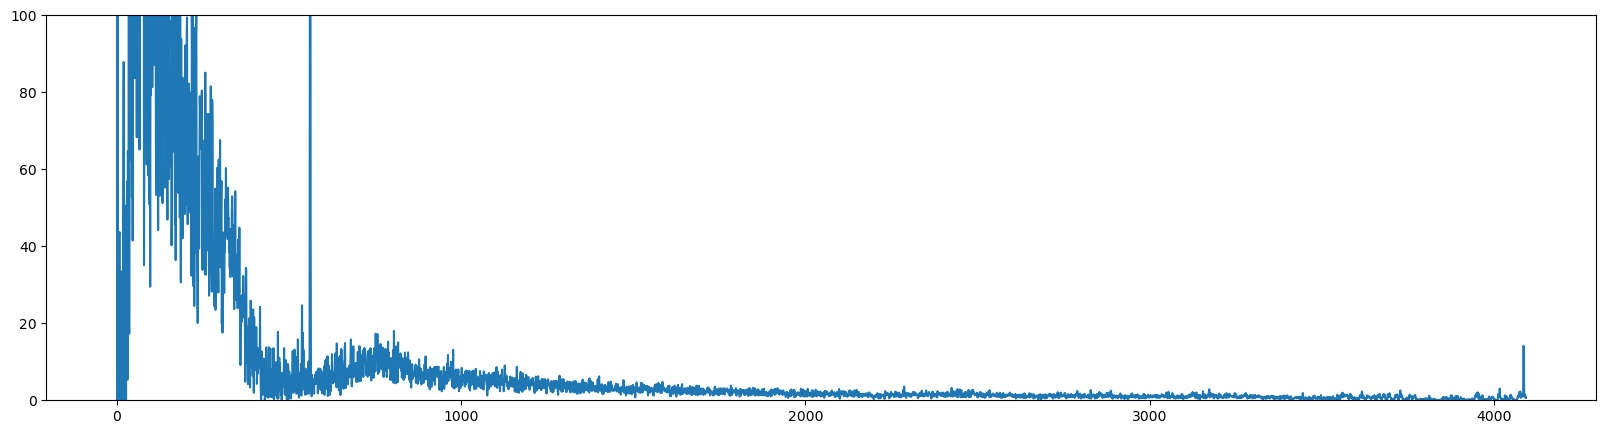

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_006.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 43)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 43)   float64   
  3  LINES         1 ImageHDU         8   (4094, 43)   float64   
  4  MASK          1 ImageHDU         8   (4094, 43)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 43)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

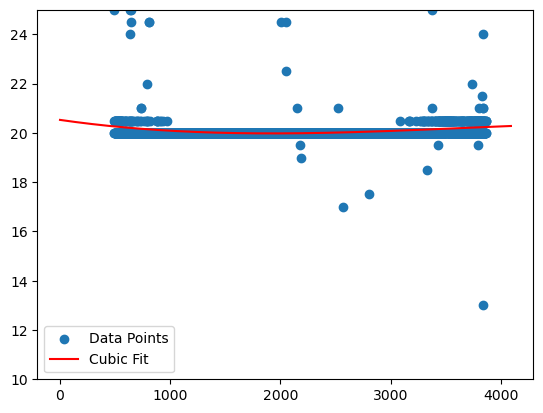

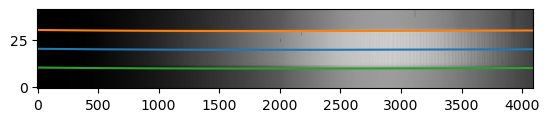

(42, 4094)


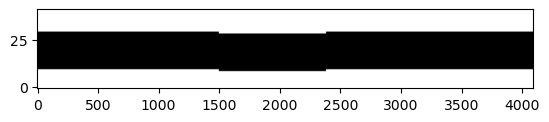

7 (42, 4094)


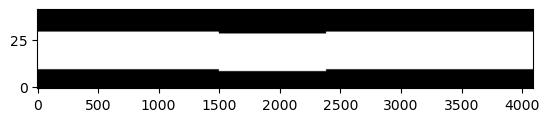

(42, 4094)
(42, 4094)


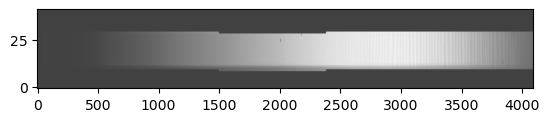

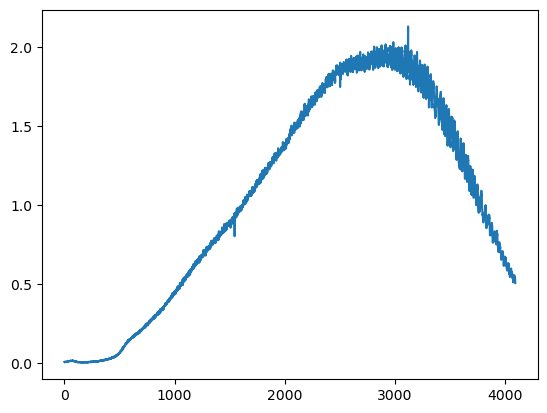

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


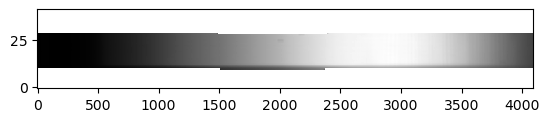

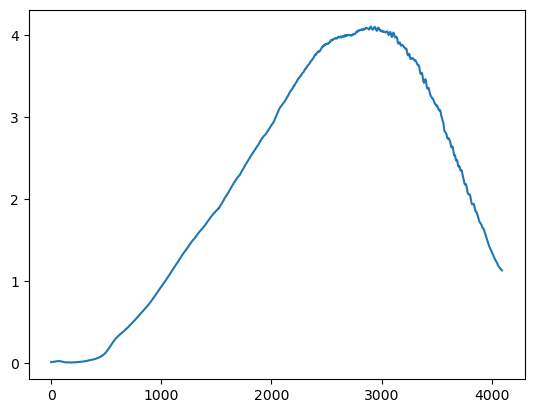

(42, 4094)
(42, 4094)


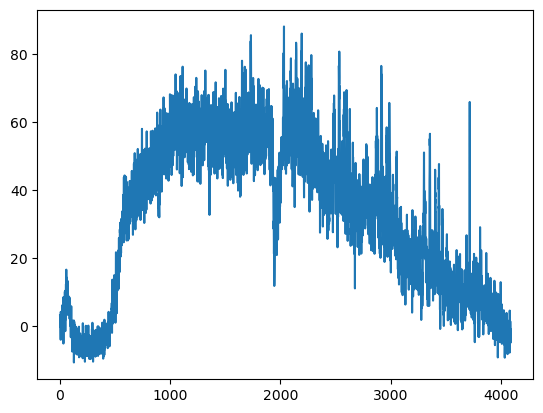

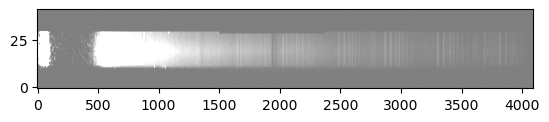

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          3.66054831  6.10521746  8.52444935
 10.32448776 13.37536787 12.05927165 15.54905203 12.91396198 16.15818725
 15.16579275 18.08832565 15.42533802 18.34940408 14.72940296 13.64664826
 15.98619484 12.30518193 10.75564809  9.425078    8.92342078  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


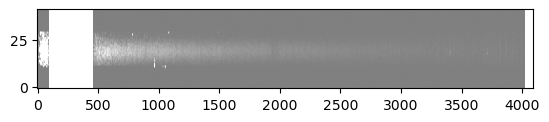

(84, 4094) (84, 4094)


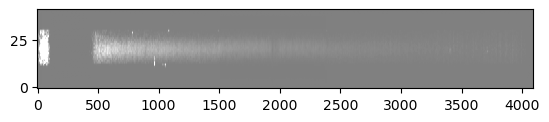

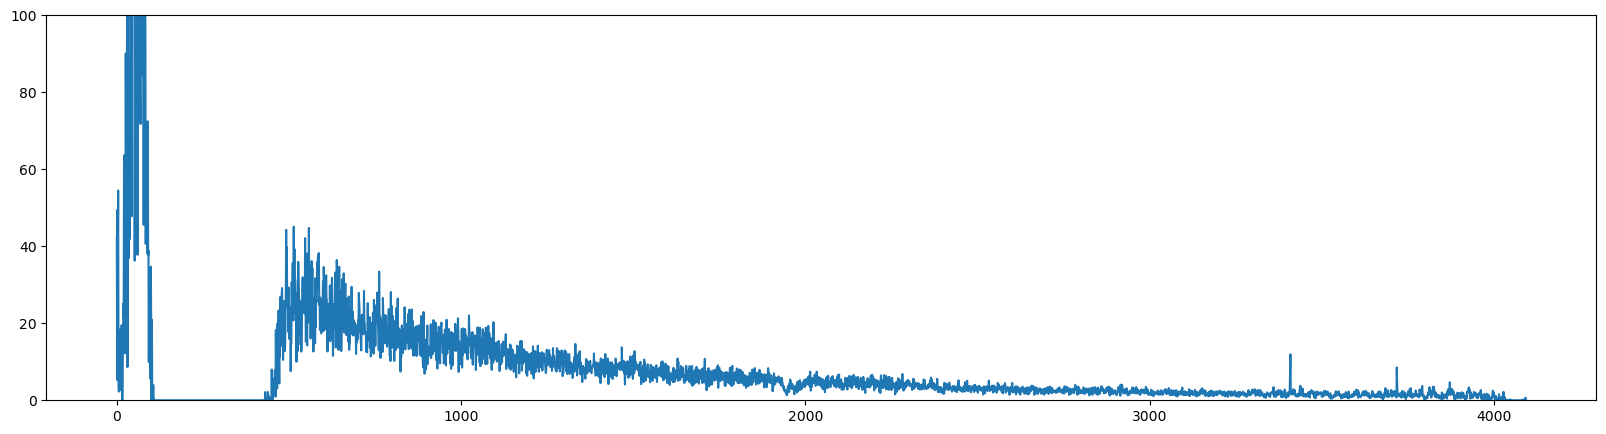

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

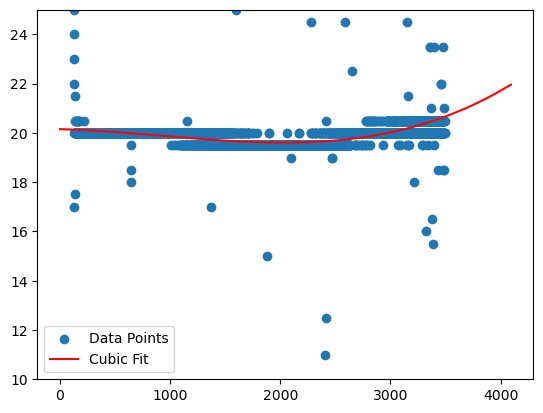

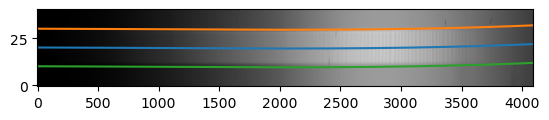

(41, 4094)


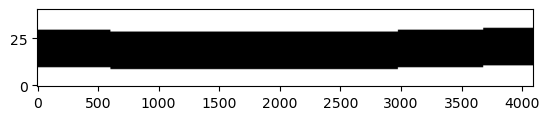

8 (41, 4094)


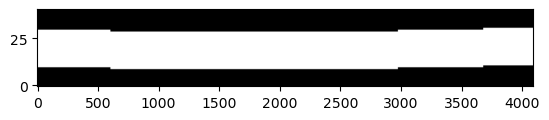

(41, 4094)
(41, 4094)


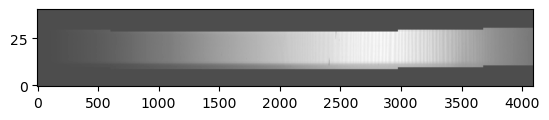

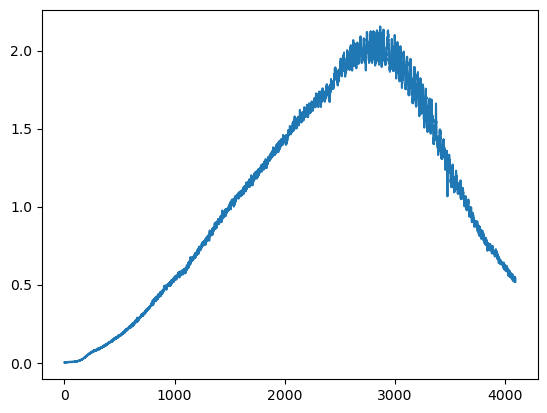

(41, 4094)
(41, 4094)
(41, 4094) (41, 4094)


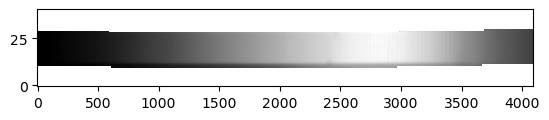

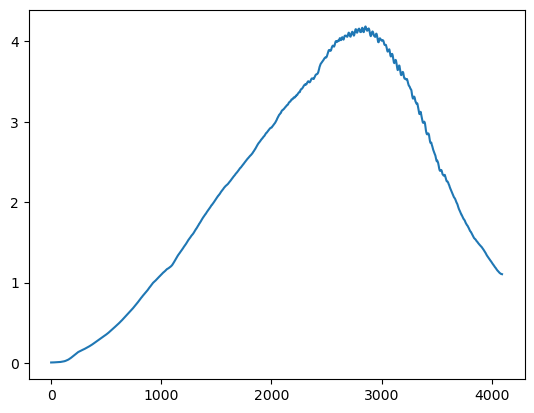

(41, 4094)
(41, 4094)


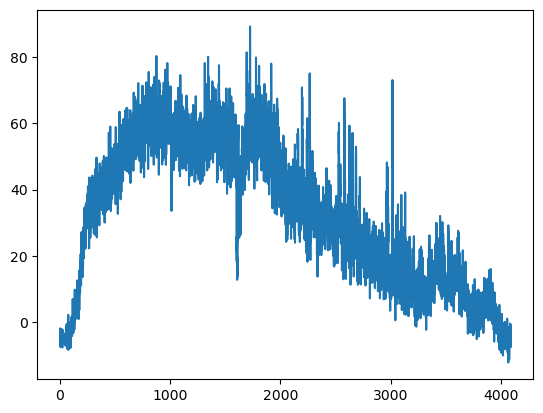

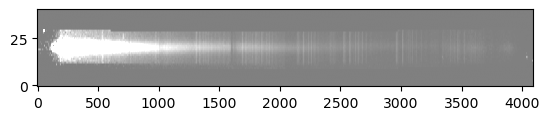

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          5.67510592  1.04005055
  1.73747024  6.18649014  3.35120359  4.81708235  6.88103432  7.11117904
  9.32450128 15.9780758  12.59640402 14.26603149 12.49499305  4.98371614
  5.88497945  6.05047616  3.7626651   2.93812804  3.58740215  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


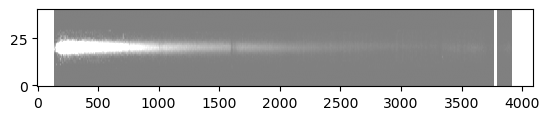

(82, 4094) (82, 4094)


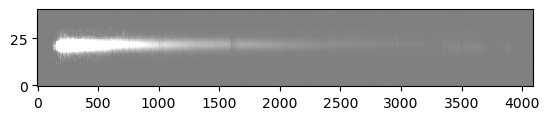

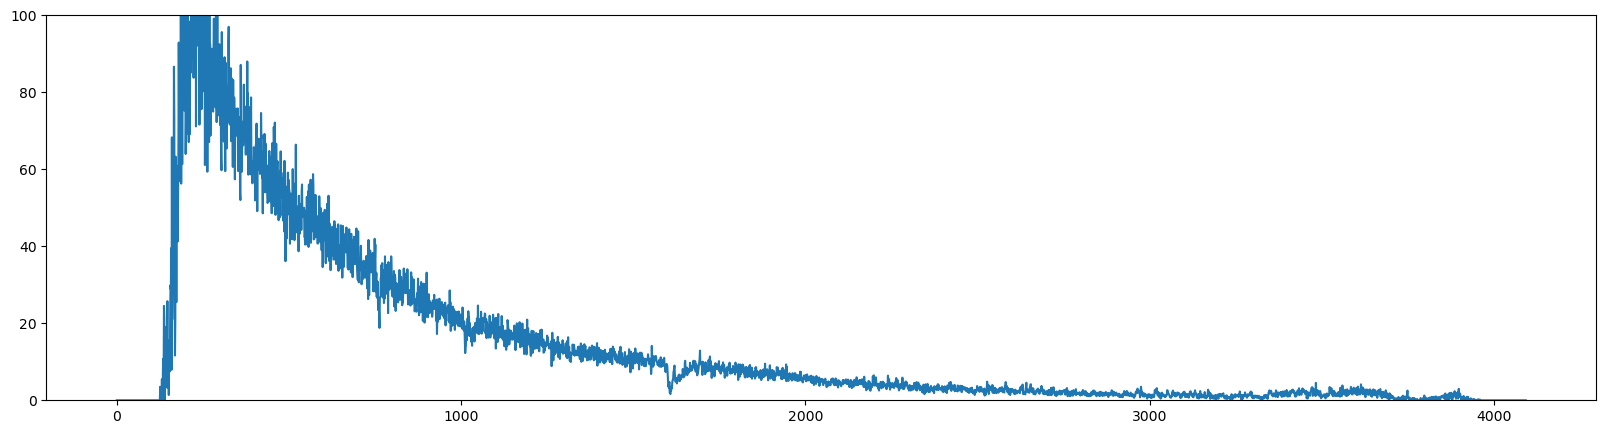

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 41)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 41)   float64   
  3  LINES         1 ImageHDU         8   (4094, 41)   float64   
  4  MASK          1 ImageHDU         8   (4094, 41)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 41)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

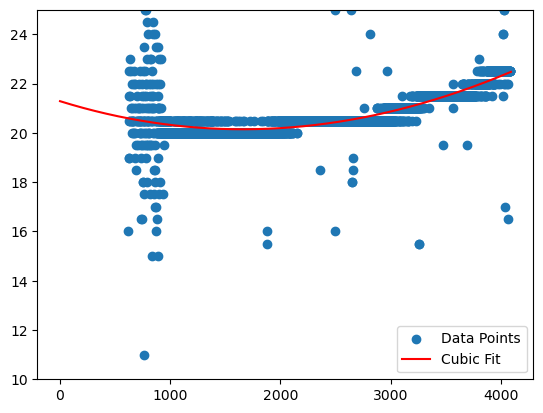

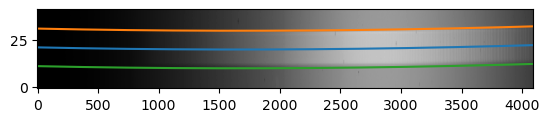

(42, 4094)


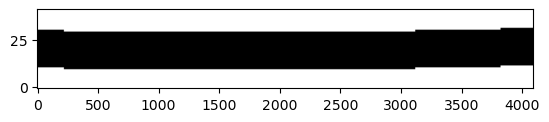

9 (42, 4094)


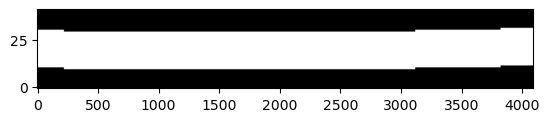

(42, 4094)
(42, 4094)


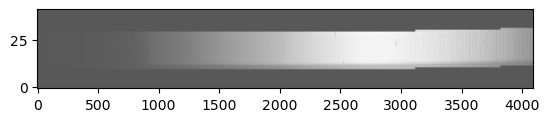

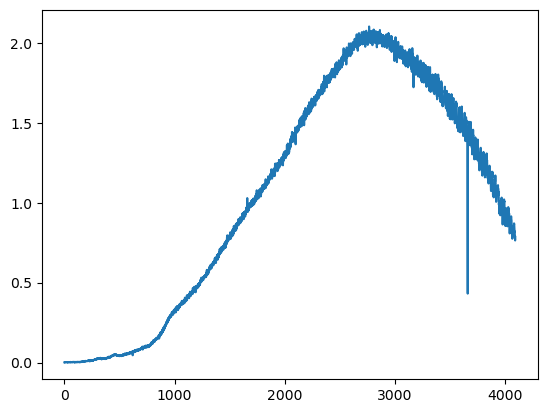

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


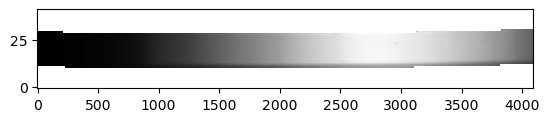

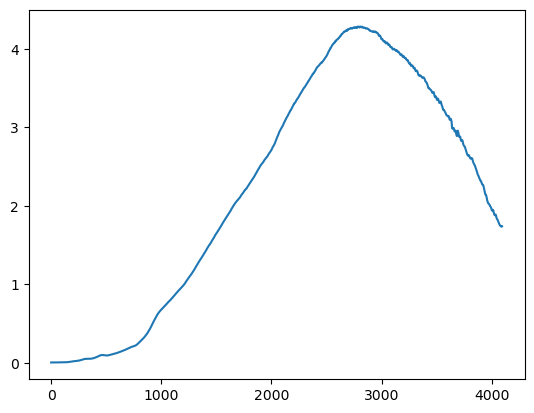

(42, 4094)
(42, 4094)


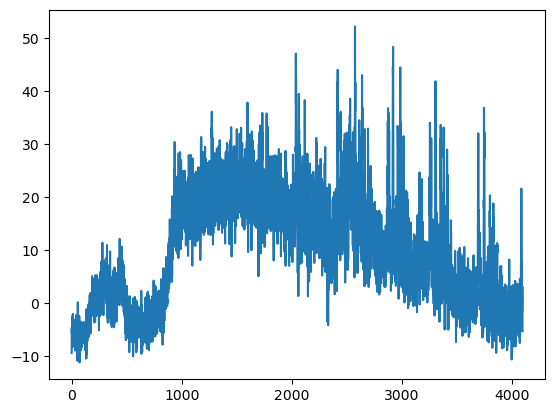

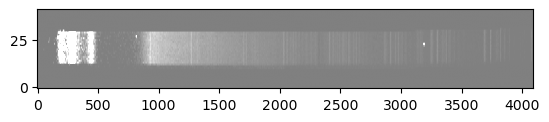

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.24678957 1.58873881
 1.3320908  5.73383602 2.74314332 6.79319026 9.71511565 5.94060405
 6.83008096 5.80817089 5.44493468 5.86921039 7.61892559 6.20606195
 7.19214401 5.83740358 4.53386623 7.34777447 5.20072536 3.30891716
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


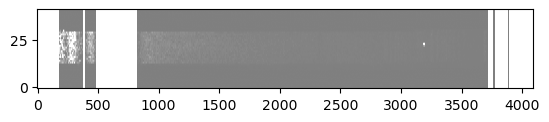

(84, 4094) (84, 4094)


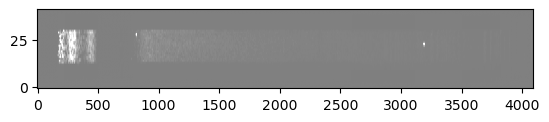

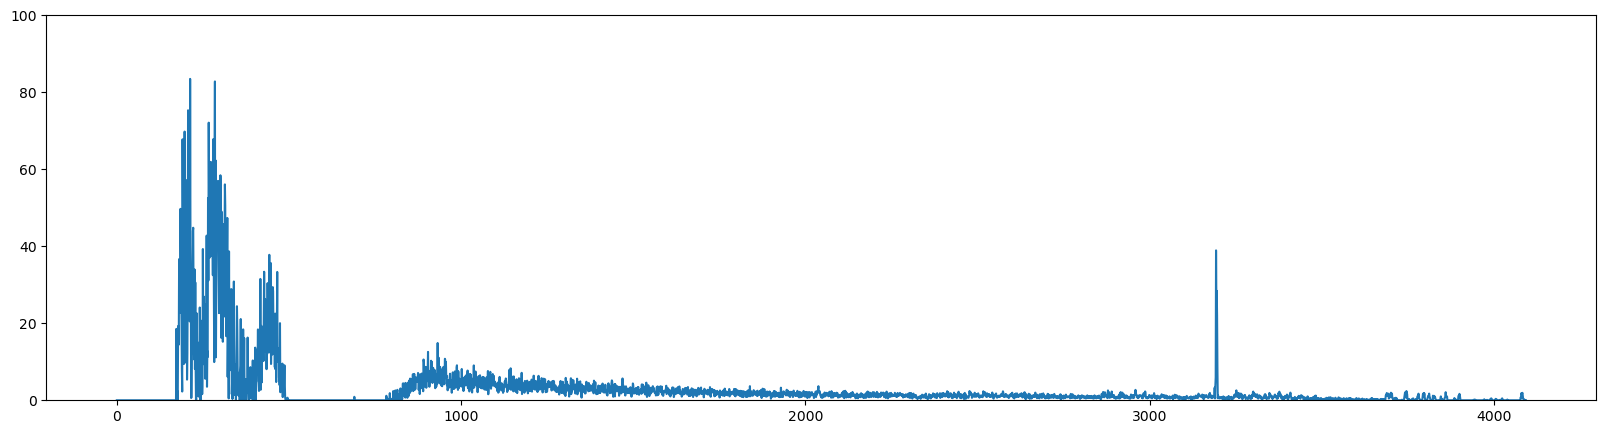

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_009.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

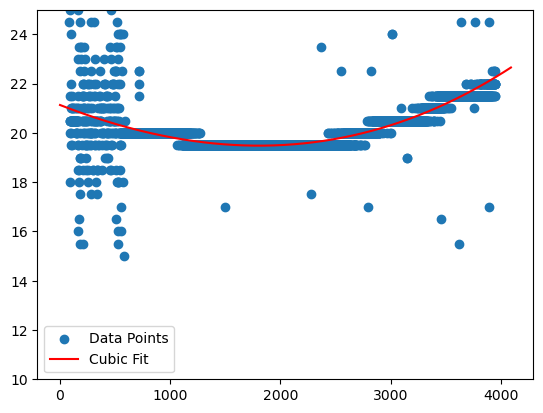

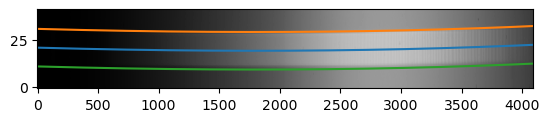

(42, 4094)


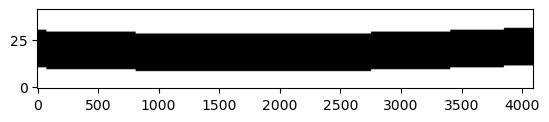

10 (42, 4094)


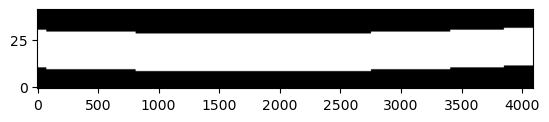

(42, 4094)
(42, 4094)


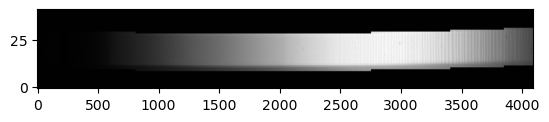

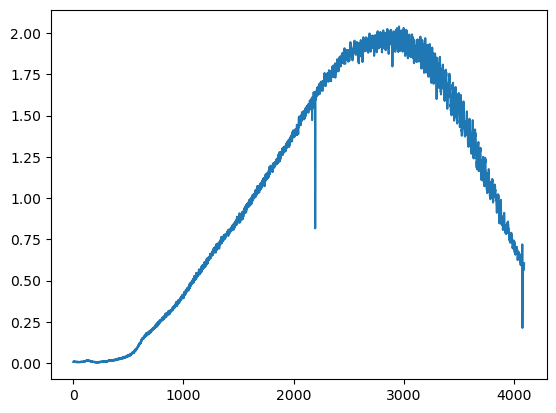

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


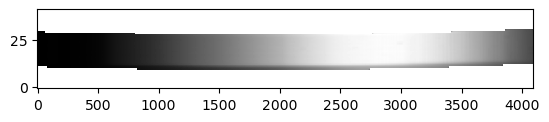

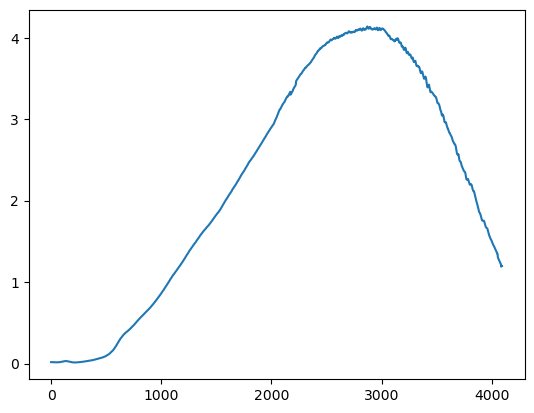

(42, 4094)
(42, 4094)


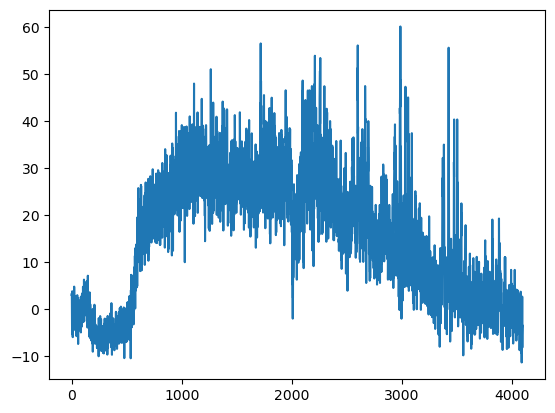

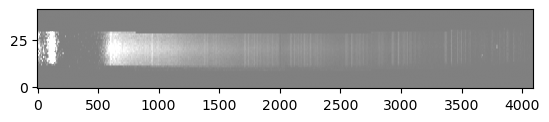

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         7.33469175 2.74536146 0.60573118
 5.21143585 4.50091938 4.12231308 4.4639702  4.53042223 3.11274843
 4.87819595 4.77544539 6.40052882 8.3510704  7.5617747  4.32771183
 5.67945175 4.12297273 4.04870496 3.09769953 4.75731339 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


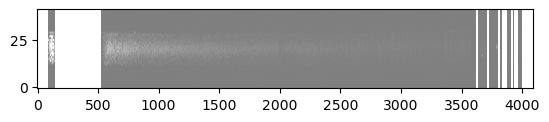

(84, 4094) (84, 4094)


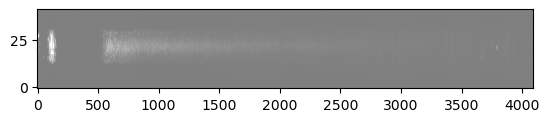

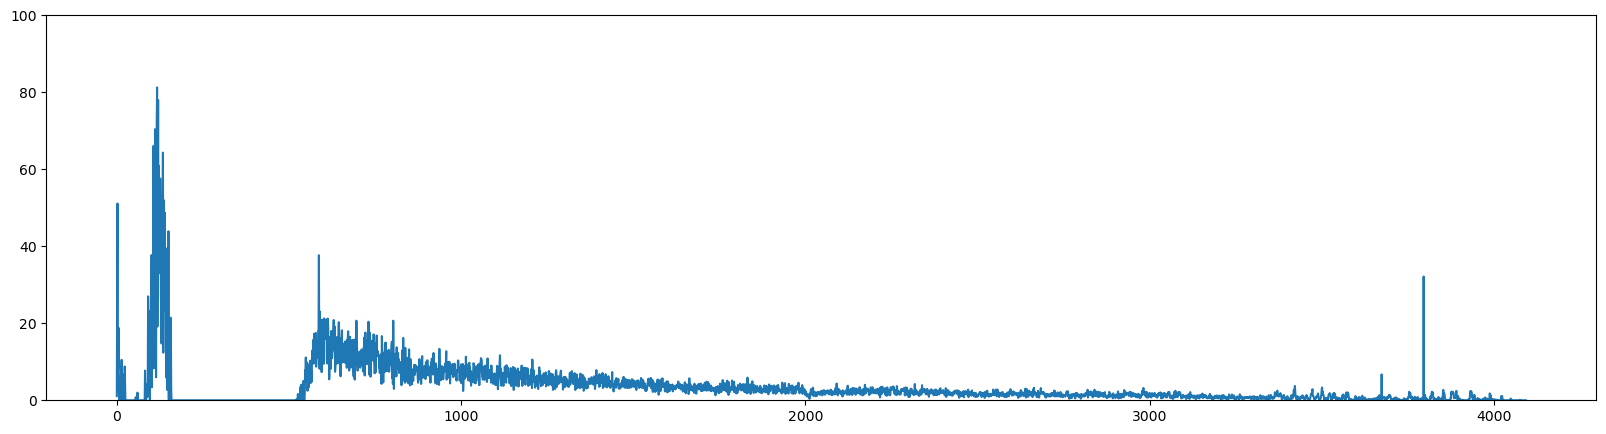

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

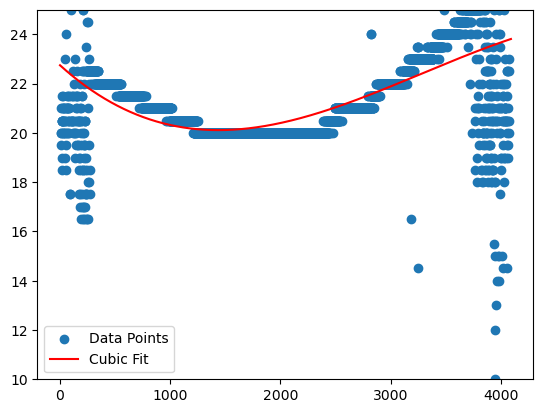

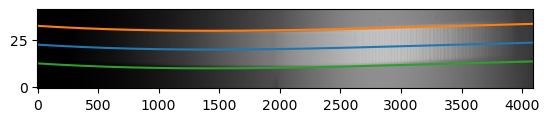

(42, 4094)


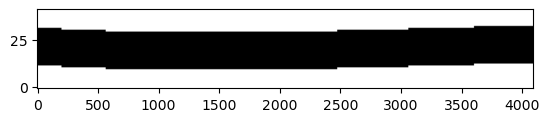

11 (42, 4094)


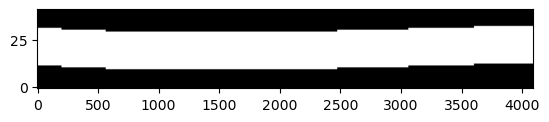

(42, 4094)
(42, 4094)


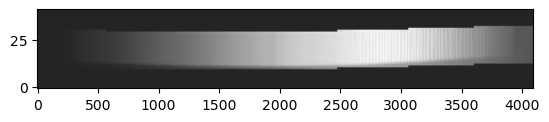

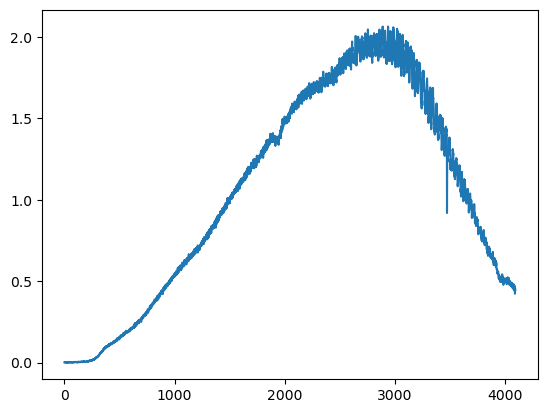

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


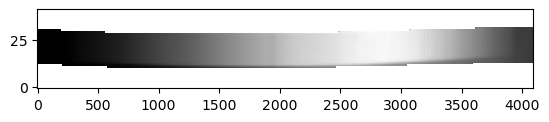

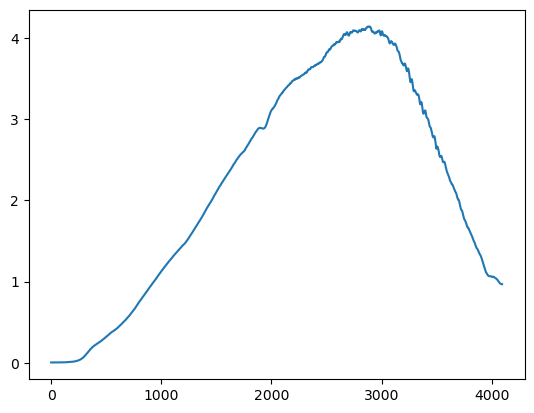

(42, 4094)
(42, 4094)


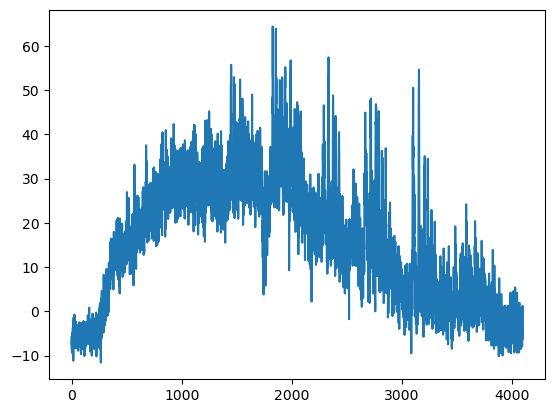

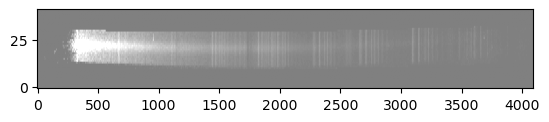

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          1.03026063  0.26991246
  4.66460457  3.98775975  5.47830514  5.24094462  3.69213255  6.18409995
  6.38154497  9.99513021  9.12320037 11.67618333  8.95131735  9.30368439
  7.19411932  5.83571958  9.20316373  4.30005632  6.56519534  6.84983573
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


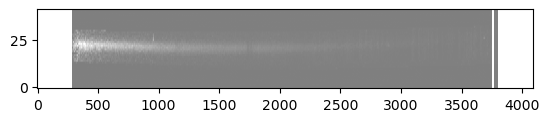

(84, 4094) (84, 4094)


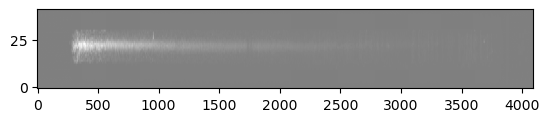

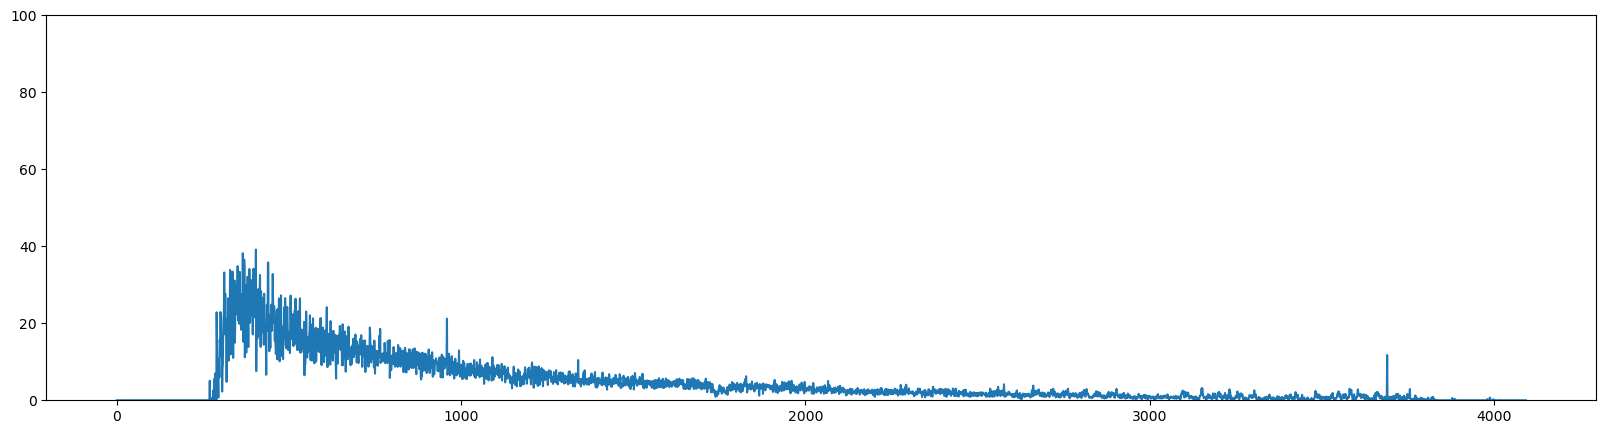

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

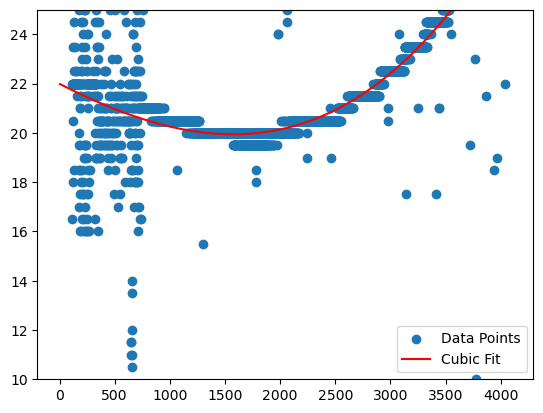

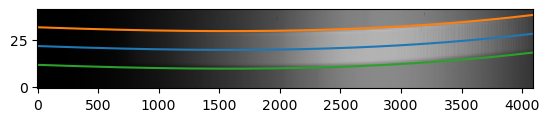

(42, 4094)


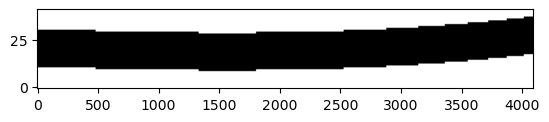

12 (42, 4094)


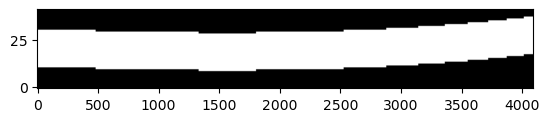

(42, 4094)
(42, 4094)


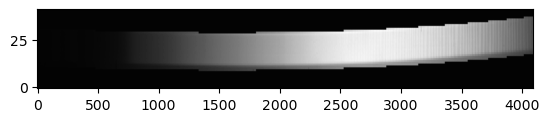

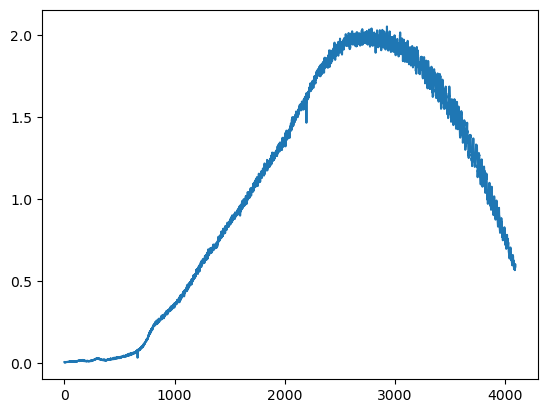

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


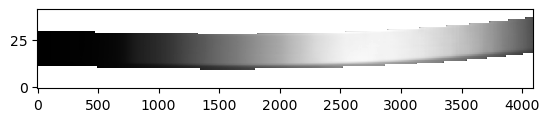

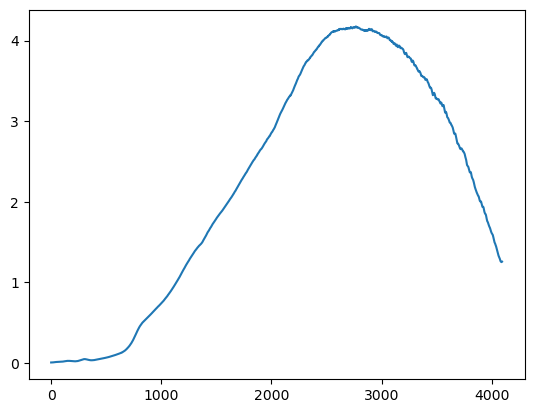

(42, 4094)
(42, 4094)


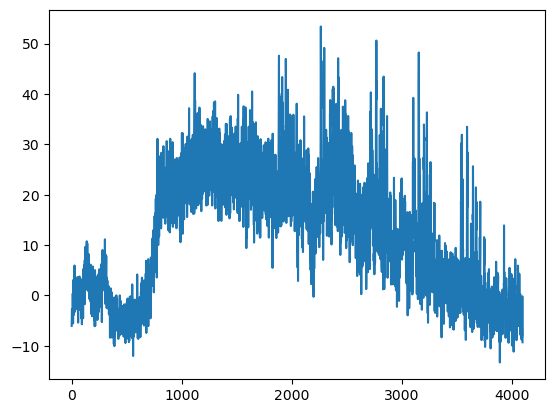

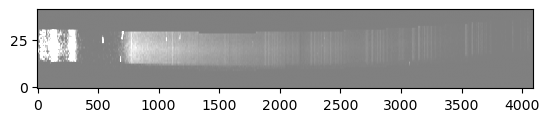

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.86122343 3.41813436
 0.75872465 5.48591193 3.15356478 4.975201   6.42396823 4.97819365
 5.71836125 7.06445405 7.66088858 7.3336854  7.62643818 7.49480924
 7.06239653 1.44192954 5.35077985 5.2019021  4.44280697 4.79293629
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


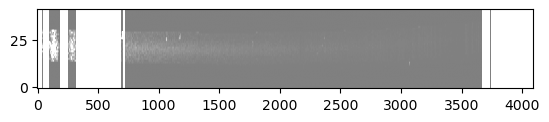

(84, 4094) (84, 4094)


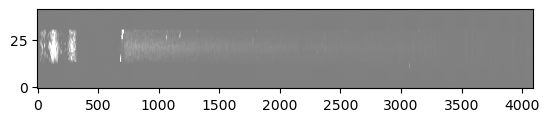

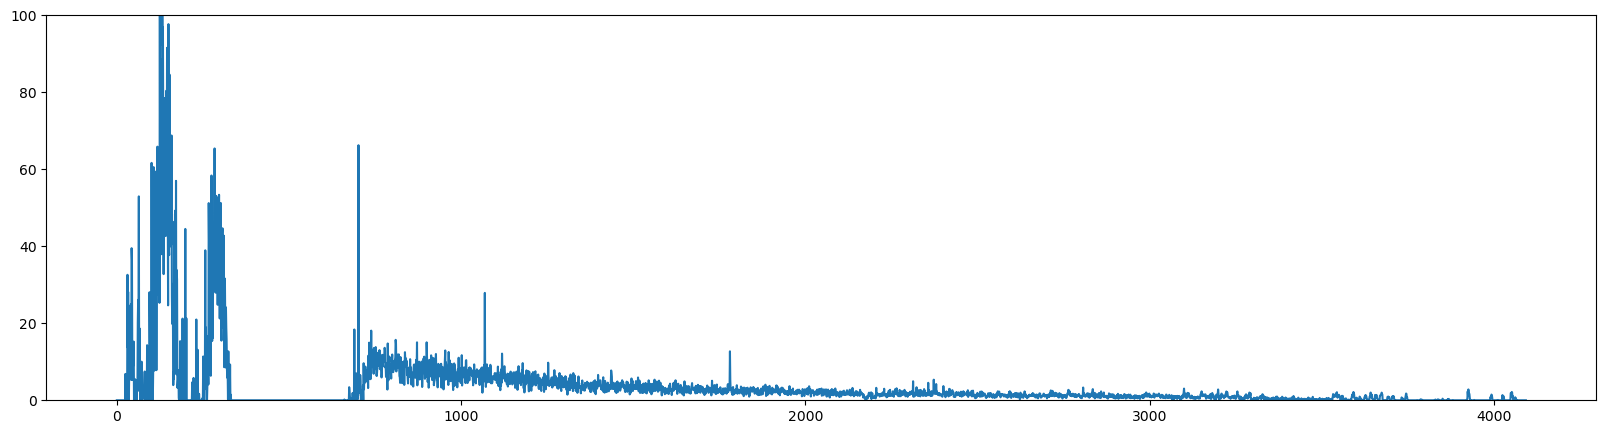

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   
Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_

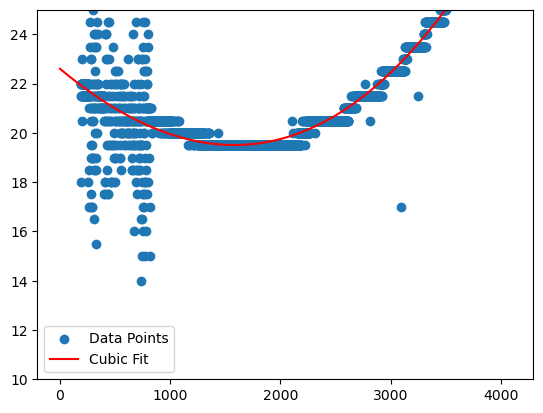

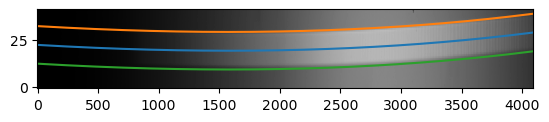

(42, 4094)


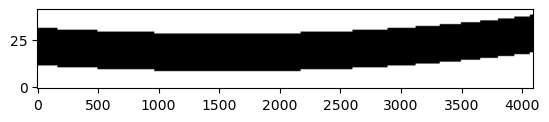

13 (42, 4094)


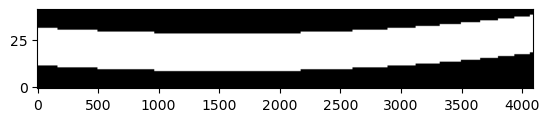

(42, 4094)
(42, 4094)


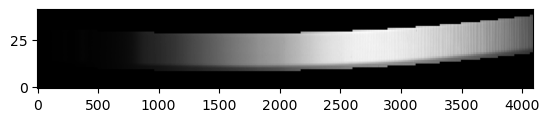

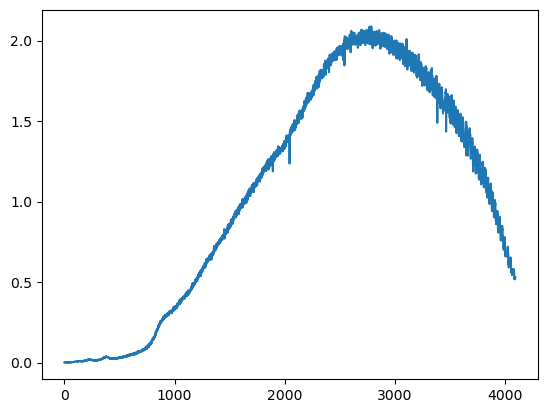

(42, 4094)
(42, 4094)
(42, 4094) (42, 4094)


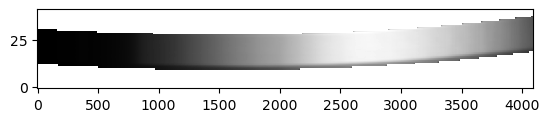

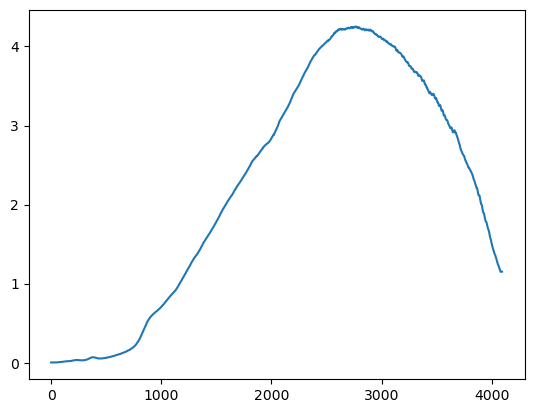

(42, 4094)
(42, 4094)


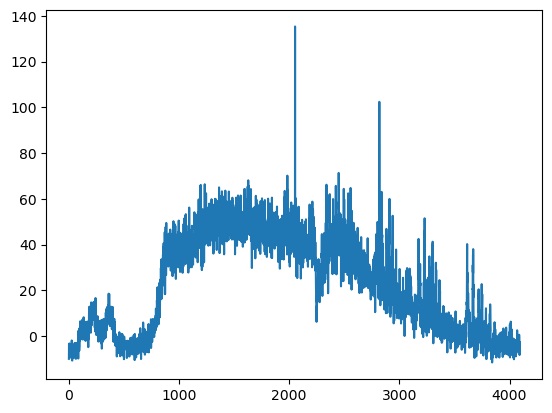

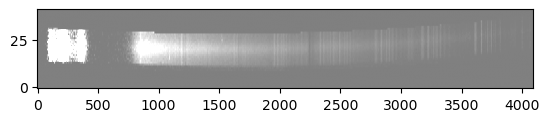

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.24143777  0.          4.38442786
  7.83426171  7.5974098   8.80472515  8.68408692  8.12210652  9.85366983
  9.34528061 15.10562133 12.3791976  16.35736619 13.44790499 12.23196651
 11.54001967 10.32671151  8.13073574  7.21187997  6.44240835  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


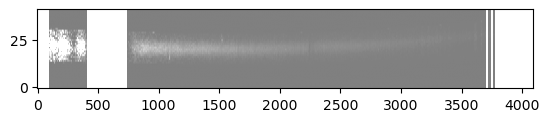

(84, 4094) (84, 4094)


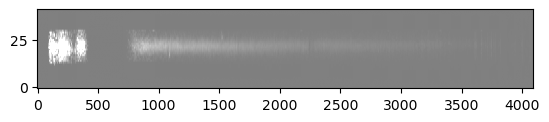

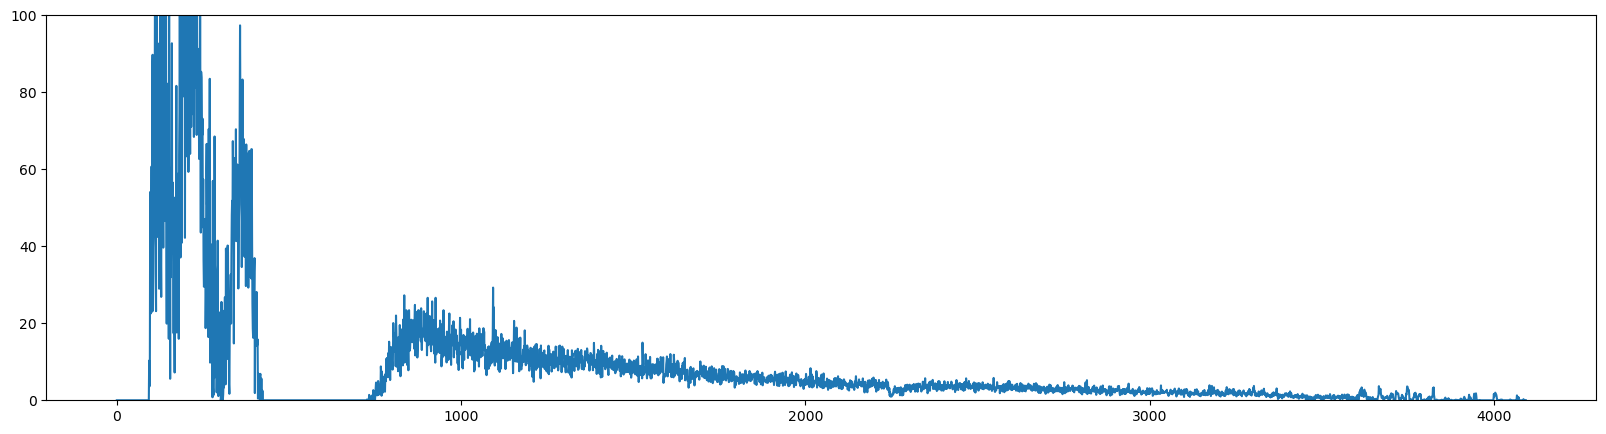

Filename: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS/ABELL3120/SAMI_manual_Mask_T00_Low_Red/spec_013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  DATA          1 ImageHDU         8   (4094, 42)   float64   
  2  FLAT          1 ImageHDU         8   (4094, 42)   float64   
  3  LINES         1 ImageHDU         8   (4094, 42)   float64   
  4  MASK          1 ImageHDU         8   (4094, 42)   float64   
  5  COEFFS        1 ImageHDU         7   (4,)   float64   
  6  CURVATURE     1 ImageHDU         8   (4094, 2)   float64   
  7  SPEC-2D       1 ImageHDU         8   (4094, 42)   float64   
  8  SPEC-1D       1 ImageHDU         8   (4094, 2)   float64   


In [11]:
#READ THE FITS FILE
#====================================================================================
#fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s)
#fits_files = working_directory+'/spec_*.fits'.format(i_s=i_s)
#N_files = 

for i_s in range(14):

    #READ THE FITS FILE
    #====================================================================================
    fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s)
    
    hdul = fits.open(fits_file)
    hdr = hdul[0].header
    hdul.info()
    print(hdr)
    slits= [hdr['i0'], hdr['i1'], hdr['i2'], hdr['i3']]
    print(slits)
    data1 = hdul[1].data
    i_flat = hdul[2].data
    i_lines = hdul[3].data
#    mask_in  = hdul[4].data
#    curvature= hdul[5].data 
#    x = curvature[0][:]
#    px = curvature[1][:]
#    print(mask_in)
    #plt.imshow(mask_in, origin='lower', cmap='gray',aspect='15.5') 
    #plt.imshow(mask_in, origin='lower', cmap='gray',vmin=0, vmax=50,aspect='15.5') 
#    print(px[3000:3200])
#    mask_out = 1-mask_in
    dx = data1.shape[1] ; print(dx)
    dy = data1.shape[0] ; print(dy)

    #Find the curvature of the spectra
    #====================================================================================
    #then the logic is to scan the rectangular area in the x direction, 
    #looking for the edges of each column; 
    #if there is no edge, skip the column
    #if there are multiple edges, pick the maximum and minimum value
    #the procedure returns the central value between the extreme edges, i.e. the center of the trace.
    
    xpix=[]
    yctr=[]
    #flat_bias_blur = cv2.GaussianBlur(i_flat,(5,5), sigmaX=0, sigmaY=0)
    #print(i_flat.shape,flat_bias_blur.shape,np.max(i_flat),np.max(flat_bias_blur))
    
    for ix in range(dx):    
        v = i_flat[:,ix]
        #threshold = (max(v)-min(v))/5  
        edges=find_edges(v)
        if len(edges) == 0:
            continue
        e0 = edges[0]
        e1 = edges[-1]
        if e0 == 0:
            continue
    #    print(i,e0,e1,np.mean([e0,e1]))
        xpix.append(ix)
        yctr.append(np.mean([e0,e1]))
    print(len(yctr))
        #print(np.mean([e0,e1]))
    
    ilen = 0
    x_good = []
    #once you reach 
    for ix in range(5,len(yctr)-6,1):
        #print(ix, yctr[ix],np.std(yctr[ix:ix+10]))
        if np.std(yctr[ix+1:ix+50]) < 1  :# ==0:
            #print(np.std(yctr[ix:ix+10]))
            x_good.append(ix)
            #imin=ix
            #ilen+=1
    #        if ilen == 50:
    #            break
    imin = min(x_good)
    imax = max(x_good)
    print('imin=',imin,imax,len(x_good))
    """
    ilen=0
    for ix in range(dx,imin,-1):
    #    print(ix,np.isnan(np.std(yctr[ix:ix+100])))
        if np.std(yctr[ix-1:ix-10]) <1  or np.isnan(np.std(yctr[ix:ix-100])) == True:
    #        print(ix)
            imax=ix
            ilen+=1
            if ilen == 50:
                break
    print(imin,imax)
    """
    #print(np.std(yctr[i:i+100]))
        
    #next we fit a polynomial, 3rd degree, to the array of centers
    coefficients = np.polyfit(xpix[imin:imax], yctr[imin:imax], 3)
    # Create polynomial function
    p = np.poly1d(coefficients)
    
    #plot to check....
    plt.ylim(10,25)
    plt.scatter(xpix[imin:imax], yctr[imin:imax], label='Data Points')
    plt.plot(xpix, p(xpix), label='Cubic Fit', color='red')
    plt.legend()
    plt.show()
    
    # but basically we have the trace.
    #Show it with an overlay on the image
    
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(i_flat, origin='lower', cmap='gray',vmin=0, vmax=20000,aspect='15.5')
    
    #ax.imshow(flat_bias_blur[slits[i_slit][0]:slits[i_slit][3],:], origin='lower', cmap='gray',vmin=0, vmax=20000,aspect='15.5')
    #print(slits[i_slit],arc_good[slits[i_slit][0]:slits[i_slit][3],:].shape)
    
    #Display the center trace
    x=np.arange(dx)
    plt.plot(x, p(x))
    #and the edges
    below = slits[1] - slits[0]-2
    above = slits[3] - slits[2]-2
    plt.plot(x, p(x)+above)
    plt.plot(x, p(x)-below)
    plt.show()
    # Plot the vector
    
    #print('\n',i_slit,flat_bias_blur[slits[i_slit][0]:slits[i_slit][3],:].shape)
    
    #display_imageslits[i_slit][1]#:i_slit[0][1],1000:1100]    

    # CREATE THE TWO BINARY MASKS: Illuminated vs. non-illuminated
    #====================================================================================
    mask_in = i_flat * 0
    mask_out = i_flat * 0
    print(mask_in.shape)
    
    for ix in range(dx):
        mask_out[0:int(p(ix)-below),ix]  = 1
        mask_out[int(p(ix)+above):,ix]  = 1
    plt.imshow(mask_out, origin='lower', cmap='gray',aspect='15.5') 
    plt.show()
    
    mask_in = 1-mask_out
    plt.imshow(mask_in, origin='lower', cmap='gray',aspect='15.5') 
    print(i_s,mask_in.shape)
    plt.show()
    print(mask_in.shape)
    
    #Extract the FLATS
    #====================================================================================
    i_flat_bck = i_flat * mask_out
    i_flat_slit = i_flat * mask_in
    print(i_flat_slit.shape)
    for ix in range(dx):
        i_flat_slit[:,ix] = i_flat_slit[:,ix] - np.mean(i_flat_bck[:,ix])
    i_flat_slit *= mask_in   
    i_flat_slit = i_flat_slit/np.mean(i_flat_slit[i_flat_slit != 0])
    plt.imshow(i_flat_slit, origin='lower', cmap='gray',aspect='15.5') 
    plt.show()
    plt.plot(i_flat_slit[20,:])
    plt.show()
    print(i_flat_slit.shape)
    
    #Creating a kernel for numpy 
    #====================================================================================
    kernel2 = np.ones((1, 50), np.float32)/50
    print(i_flat_slit.shape)  
    
    # Applying the filter 
    #====================================================================================
    i_flat_slit_smooth = cv2.filter2D(src=i_flat_slit, ddepth=-1, kernel=kernel2) 
    print(i_flat_slit.shape,i_flat_slit_smooth.shape)
    
    #flat_slit_smooth *= mask_in   
    #====================================================================================
    i_flat_slit_smooth = i_flat_slit_smooth/np.mean(i_flat_slit_smooth[i_flat_slit_smooth != 0])
    i_flat_slit_smooth *= mask_in
    i_flat_slit_smooth[i_flat_slit_smooth ==  0] = np.nan
    plt.imshow(i_flat_slit_smooth, origin='lower', cmap='gray',aspect='15.5') 
    plt.show()
    plt.plot(i_flat_slit_smooth[20,:])
    plt.show()
    print(i_flat_slit_smooth.shape)
    
    
    #flat field the image
    #====================================================================================
    i_spectra_slit  = data1 * mask_in
    i_spectra_bck = data1 * mask_out
    for ix in range(dx):
        i_spectra_slit[:,ix] = i_spectra_slit[:,ix] - np.mean(i_spectra_bck[:,ix])
    i_spectra_slit *= mask_in   
    print(i_spectra_slit.shape)
    
    plt.plot(i_spectra_slit[20,:])
    plt.show()
    i_spectra_slit_ff = i_spectra_slit / i_flat_slit_smooth
    i_spectra_slit_ff = np.nan_to_num(i_spectra_slit_ff,posinf=0, neginf=0)
    i_spectra_slit_ff[i_spectra_slit_ff<0]=0
    #print(spectra_slit_ff)
    plt.imshow(i_spectra_slit_ff*mask_in, origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    plt.show()
    print(i_spectra_slit_ff[:,2000])
    
    #subtract the sky
    #====================================================================================
    i_spectra_slit_ff_OH = copy.deepcopy(i_spectra_slit_ff)
    for ix in range(dx):#2000,2001):
    #for ix in range(2000,2001):
    
        #print(ix)
        v=i_spectra_slit_ff_OH[:,ix]
        #print(v)
        v=v[v != 0]
        #print(v)
        vs = np.sort(v)
        #print('\nvs = ',vs[1:8])
        mmm = np.median(vs[3:8])
        #print(mmm)
        i_spectra_slit_ff_OH[:,ix] = i_spectra_slit_ff[:,ix] - mmm
        i_spectra_slit_ff_OH[i_spectra_slit_ff_OH<0]=0    
    #print(spectra_slit_ff_rect_OH[:,i])
    plt.imshow(i_spectra_slit_ff_OH,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    plt.show()
    #plt.plot(i_spectra_slit_ff_OH[25,:])
    
    
    #plt.plot(i_spectra_slit_ff_rect[14,2000:3000]-i_spectra_slit_ff_rect[26,2000:3000])
    
    #plt.plot(i_spectra_slit_ff_rect[14,2000:3000]-i_spectra_slit_ff_rect[26,2000:3000])
    
    #rectify the spectrum
    #====================================================================================
    import scipy.ndimage
    hy  = i_spectra_slit_ff_OH.shape[0]
    hx  = i_spectra_slit_ff_OH.shape[1]
    order=2
    i0 = np.zeros([hy*order,hx])  #out resampled 
    #print(i0.shape,np.isnan(np.min(i0)))
    #plt.imshow(i0,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    
    i1 = scipy.ndimage.zoom(i_spectra_slit_ff_OH, (order,1), order=1) #input resampled
    i1=np.nan_to_num(i1, nan=0.0)
    #print(i1.shape,np.isnan(np.min(i01)))
    #plt.imshow(i1,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    #plt.show()
    
    i1[i1<0]=0
    #plt.imshow(i1,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    #plt.show()
    print(i0.shape,i1.shape)
    from scipy import signal
    for ix in range(dx):
        f = signal.resample(i_spectra_slit_ff_OH[:,ix], hy*order)
        i0[:,ix] = np.roll( i1[:,ix],-int(order*p(ix))+21*order)#hy/2*order))        
    
    i_spectra_slit_ff_OH_rect = scipy.ndimage.zoom(i0, (1/order,1), order=order)
    plt.imshow(i_spectra_slit_ff_OH_rect,origin='lower', cmap='gray',vmin=-50, vmax=50,aspect='15.5') 
    plt.show()
    i_spectra_slit_ff_OH_rect[i_spectra_slit_ff_OH_rect<0.01]=0
    (slits[1]+slits[2])/2-slits[1]
    #print(i_spectra_slit_ff_OH_rect[:,2000])
    
    #Look at the 1-d spectrum
    #====================================================================================
    i_spectrum_1d = i_spectra_slit_ff_OH_rect[17:27,:].mean(axis=0)
    plt.figure(figsize=(20,5))
    plt.ylim([0,100])
    plt.plot(i_spectrum_1d) 
    plt.show()
    
    
    #CREATE FITS DATACUBE
    #====================================================================================
    fits_file = working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s)
    hdulist = fits.open(fits_file)

        #add mask
    mask_hdu = fits.ImageHDU(data=mask_in, name= "MASK")
    hdulist.append(mask_hdu)
    #add coefficients
    coefficients_hdu = fits.ImageHDU(data=coefficients, name= "coeffs")
    hdulist.append(coefficients_hdu)
    #add curvature
    curvature = [x,p(x)]
    mask_hdu = fits.ImageHDU(data=[x,p(x)], name= "curvature")
    hdulist.append(mask_hdu)
    #add 2d spectrum
    final2d_hdu = fits.ImageHDU(data=i_spectra_slit_ff_OH_rect, name= "SPEC-2d")
    hdulist.append(final2d_hdu)
    #add 1d spectrum
    spec1d = [x,i_spectrum_1d]
    final1d_hdu = fits.ImageHDU(data=spec1d, name= "SPEC-1d")
    hdulist.append(final1d_hdu)
    
    hdulist.info()
    hdulist.writeto(working_directory+'/spec_{i_s:03.0f}.fits'.format(i_s=i_s),overwrite=True)
    hdulist.close()
    